# Modelo Recomendacao Imoveis PySpark!

## Biblioteca

In [ ]:
!pip install pyspark==3.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Iniciando Spark
import os
#import findspark
#from pyspark.sql import SparkSession

# Carrregando dados Spark

import zipfile

## Iniciando Spark

In [ ]:
from pyspark.sql import SparkSession

#os.environ["JAVA_HOME"] = "C:\Program Files\Java\jre1.8.0_351"
#os.environ["SPARK_HOME"] = "C:\Spark\spark-3.2.2-bin-hadoop2.7"

#findspark.init()

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Transformacao com Spark") \
    .getOrCreate()

spark

## Carregando dados imoveis

https://spark.apache.org/docs/latest/sql-data-sources-json.html

In [ ]:
# A JSON dataset is pointed to by path.
# The path can be either a single text file or a directory storing text files
#path = r'C:\Users\franc\Google Drive\# Academico\# Programacao\Alura Challenges - Imoveis\Dados\dataset_bruto.json'
#path = r'Dados/dataset_bruto.json'
#dados = spark.read.json(path)

In [ ]:
!wget 'https://caelum-online-public.s3.amazonaws.com/challenge-spark/semana-1.zip' && unzip semana-1.zip -d dados/

--2022-12-08 16:12:08--  https://caelum-online-public.s3.amazonaws.com/challenge-spark/semana-1.zip
Resolving caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)... 54.231.170.217, 52.217.196.65, 52.217.165.145, ...
Connecting to caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)|54.231.170.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18975214 (18M) [application/zip]
Saving to: ‘semana-1.zip.3’

semana-1.zip.3      100%[===================>]  18.10M  42.5MB/s    in 0.4s    

2022-12-08 16:12:09 (42.5 MB/s) - ‘semana-1.zip.3’ saved [18975214/18975214]

Archive:  semana-1.zip
replace dados/dataset_bruto.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dados/dataset_bruto.json  


In [ ]:
dados = spark.read.json(
    'dados/dataset_bruto.json'
)

In [ ]:
dados

DataFrame[anuncio: struct<andar:bigint,area_total:array<string>,area_util:array<string>,banheiros:array<bigint>,caracteristicas:array<string>,endereco:struct<bairro:string,cep:string,cidade:string,estado:string,latitude:double,longitude:double,pais:string,rua:string,zona:string>,id:string,quartos:array<bigint>,suites:array<bigint>,tipo_anuncio:string,tipo_unidade:string,tipo_uso:string,vaga:array<bigint>,valores:array<struct<condominio:string,iptu:string,tipo:string,valor:string>>>, imagens: array<struct<id:string,url:string>>, usuario: struct<id:string,nome:string>]

In [ ]:
type(dados)

pyspark.sql.dataframe.DataFrame

## Análise dos dados

In [ ]:
dados.printSchema()

root
 |-- anuncio: struct (nullable = true)
 |    |-- andar: long (nullable = true)
 |    |-- area_total: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- area_util: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- banheiros: array (nullable = true)
 |    |    |-- element: long (containsNull = true)
 |    |-- caracteristicas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- endereco: struct (nullable = true)
 |    |    |-- bairro: string (nullable = true)
 |    |    |-- cep: string (nullable = true)
 |    |    |-- cidade: string (nullable = true)
 |    |    |-- estado: string (nullable = true)
 |    |    |-- latitude: double (nullable = true)
 |    |    |-- longitude: double (nullable = true)
 |    |    |-- pais: string (nullable = true)
 |    |    |-- rua: string (nullable = true)
 |    |    |-- zona: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-

In [ ]:
dados.count()

89083

In [ ]:
dados.show()

+--------------------+--------------------+--------------------+
|             anuncio|             imagens|             usuario|
+--------------------+--------------------+--------------------+
|{0, [], [16], [0]...|[{39d6282a-71f3-4...|{9d44563d-3405-4e...|
|{0, [], [14], [0]...|[{23d2b3ab-45b0-4...|{36245be7-70fe-40...|
|{0, [1026], [1026...|[{1da65baa-368b-4...|{9dc415d8-1397-4d...|
|{0, [120], [120],...|[{79b542c6-49b4-4...|{9911a2df-f299-4a...|
|{0, [3], [3], [0]...|[{e2bc497b-6510-4...|{240a7aab-12e5-40...|
|{0, [20], [15], [...|[{2de09d46-dc0d-4...|{3c7057f5-0923-42...|
|{3, [43], [43], [...|[{147a80d9-cd40-4...|{5a9736b5-aaa0-4a...|
|{2, [42], [42], [...|[{35740004-063d-4...|{ec48d96a-137c-49...|
|{0, [], [12], [0]...|[{6d3d2aec-c96f-4...|{dad7db63-e19c-44...|
|{1, [41], [41], [...|[{3d404069-418e-4...|{a845f35f-3ab3-46...|
|{3, [43], [43], [...|[{5b8a8de7-2088-4...|{8c8de313-45d5-4c...|
|{0, [10], [4], [0...|[{5385da42-8276-4...|{0b1d4ee0-2bc3-4c...|
|{0, [12], [12], [...|[{7

In [ ]:
dados.show(1, truncate = False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------+
|anuncio                                                                                                                                                                                                                                         |imagens                                                                                                                                           |usuario                                      |
+-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
dados.limit(10).toPandas()

,anuncio,imagens,usuario
0,"(0, [], [16], [0], [], (Centro, 20061003, Rio ...","[(39d6282a-71f3-47bc-94aa-909351ecd881, https:...","(9d44563d-3405-4e84-9381-35b7cf40a9a4, Frank)"
1,"(0, [], [14], [0], [], (Centro, 20051040, Rio ...","[(23d2b3ab-45b0-47f2-a27f-ffbe066c2c38, https:...","(36245be7-70fe-40cd-84d4-70a57dc8f976, Caroline)"
2,"(0, [1026], [1026], [0], [], (Maria da Graça, ...","[(1da65baa-368b-490f-bef7-1834b9a428c1, https:...","(9dc415d8-1397-4d8d-8425-b8310fad309d, Oliver)"
3,"(0, [120], [120], [0], [Portão eletrônico, Con...","[(79b542c6-49b4-4f06-80b5-ef4fcdf98f76, https:...","(9911a2df-f299-4a73-a384-281417abaf69, Matthew)"
4,"(0, [3], [3], [0], [], (São Cristóvão, 2093167...","[(e2bc497b-6510-4731-8942-97b3d3cdab5e, https:...","(240a7aab-12e5-4069-9a2c-9dca4c4f9c68, Jude)"
5,"(0, [20], [15], [1], [], (Centro, 20231047, Ri...","[(2de09d46-dc0d-47cf-aed2-a34e1dacce90, https:...","(3c7057f5-0923-42eb-8b6d-25f3e61155ef, David)"
6,"(3, [43], [43], [1], [Academia, Churrasqueira,...","[(147a80d9-cd40-4a57-bece-a45ea729ddae, https:...","(5a9736b5-aaa0-4a35-8632-26bbd8bd5cbe, Hope)"
7,"(2, [42], [42], [1], [Churrasqueira, Playgroun...","[(35740004-063d-489b-b84c-f278c018e9f3, https:...","(ec48d96a-137c-49d5-ad7a-66c39932f599, Margareth)"
8,"(0, [], [12], [0], [Portaria 24h, Elevador], (...","[(6d3d2aec-c96f-4e57-8b31-8400af100b65, https:...","(dad7db63-e19c-4420-a64d-f3052ffbba4b, Sean)"
9,"(1, [41], [41], [1], [Portaria 24h, Condomínio...","[(3d404069-418e-4a3f-a087-f4007f701869, https:...","(a845f35f-3ab3-4619-9e53-259a6539af60, Nicole)"


## DataFrame coluna Anuncio

Como pessoa engenheira de dados temos como uma de nossas responsabilidades a disponibilização dos dados para que os usuários interessados possam realizar suas análises.

Na imobiliária InsightPlaces temos um website que torna público os anúncios dos imóveis que pertencem ao portfólio da imobiliária. Este site é alimentado por uma API REST que consulta nosso sistema de banco de dados e retorna um arquivo JSON que é tratado pelo frontend e exibido na tela do usuário. A imobiliária utiliza como SGBD deste recurso (anúncios) o MongoDB que é um SGBD noSQL, ou seja, ele trabalha com dados não estruturados e suas collections são armazenadas no formato JSON.

Nosso cliente nessa demanda é a equipe de ciência de dados da InsightPlaces que precisa de um conjunto de dados para criar um modelo de machine learning para possibilitar a criação de um projeto da empresa que consiste em uma ferramenta de avaliação de imóveis usados.

In [ ]:
anuncio = dados\
    .select(
        'anuncio.*'
            )

In [ ]:
anuncio.limit(3).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,endereco,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores
0,0,[],[16],[0],[],"(Centro, 20061003, Rio de Janeiro, Rio de Jane...",47d553e0-79f2-4a46-9390-5a3c962740c2,[0],[0],Usado,Outros,Comercial,[1],"[(260, 107, Venda, 10000)]"
1,0,[],[14],[0],[],"(Centro, 20051040, Rio de Janeiro, Rio de Jane...",b6ffbae1-17f6-4870-9950-e998ac1c8d6a,[0],[],Usado,Outros,Comercial,[0],"[(260, 107, Venda, 10000)]"
2,0,[1026],[1026],[0],[],"(Maria da Graça, 20785360, Rio de Janeiro, Rio...",1fb030a5-9e3e-4a1d-93cd-cd2d8a215e11,[0],[],Usado,Outros,Comercial,[0],"[(None, 1613, Venda, 10000)]"


In [ ]:
anuncio\
    .select('tipo_uso')\
    .groupBy('tipo_uso')\
    .count()\
    .show()

+-----------+-----+
|   tipo_uso|count|
+-----------+-----+
|  Comercial| 4542|
|Residencial|84541|
+-----------+-----+



In [ ]:
anuncio\
    .select('tipo_unidade')\
    .groupBy('tipo_unidade')\
    .count()\
    .show()

+------------+-----+
|tipo_unidade|count|
+------------+-----+
|      Outros|11963|
| Apartamento|66801|
|        Casa|10319|
+------------+-----+



In [ ]:
anuncio\
    .select('quartos')\
    .groupBy('quartos')\
    .count()\
    .orderBy('count', ascending = False)\
    .show()

+-------+-----+
|quartos|count|
+-------+-----+
|    [3]|29372|
|    [2]|28375|
|    [4]|15183|
|    [1]| 6802|
|    [0]| 4403|
|    [5]| 2971|
|     []|  803|
|    [6]|  692|
|    [7]|  144|
|    [8]|   85|
| [2, 3]|   56|
| [1, 2]|   31|
|   [10]|   30|
| [3, 4]|   29|
| [2, 4]|   22|
|    [9]|   21|
| [1, 3]|    9|
| [4, 5]|    8|
|   [12]|    8|
|   [14]|    8|
+-------+-----+
only showing top 20 rows



In [ ]:
anuncio\
    .select('banheiros')\
    .groupBy('banheiros')\
    .count()\
    .orderBy('count', ascending = False)\
    .show()

+---------+-----+
|banheiros|count|
+---------+-----+
|      [2]|28029|
|      [1]|21015|
|      [3]|17663|
|      [4]| 8742|
|      [5]| 5468|
|      [6]| 3123|
|      [0]| 1864|
|      [7]| 1480|
|      [8]|  741|
|      [9]|  266|
|     [10]|  197|
|       []|  173|
|     [11]|   68|
|     [13]|   40|
|   [2, 3]|   40|
|     [12]|   35|
|   [1, 2]|   23|
|     [14]|   17|
|   [3, 4]|   16|
|   [5, 6]|    9|
+---------+-----+
only showing top 20 rows



In [ ]:
anuncio\
    .select('area_util')\
    .groupBy('area_util')\
    .count()\
    .orderBy('count', ascending = False)\
    .show()

+---------+-----+
|area_util|count|
+---------+-----+
|     [70]| 2546|
|     [80]| 1875|
|     [90]| 1694|
|     [60]| 1654|
|    [100]| 1604|
|    [120]| 1445|
|    [110]| 1322|
|     [75]| 1286|
|     [65]| 1256|
|     [50]| 1240|
|     [85]| 1083|
|    [150]| 1047|
|     [55]|  999|
|     [45]|  936|
|     [78]|  902|
|    [140]|  829|
|     [68]|  824|
|    [180]|  819|
|    [130]|  802|
|    [160]|  781|
+---------+-----+
only showing top 20 rows



In [ ]:
anuncio\
    .select('area_total')\
    .groupBy('area_total')\
    .count()\
    .orderBy('count', ascending = False)\
    .show()

+----------+-----+
|area_total|count|
+----------+-----+
|        []|12595|
|      [70]| 2195|
|      [80]| 1528|
|     [100]| 1385|
|      [60]| 1362|
|      [90]| 1338|
|     [120]| 1321|
|      [75]| 1145|
|     [110]| 1144|
|      [65]| 1050|
|      [50]| 1046|
|     [150]|  934|
|      [85]|  899|
|      [55]|  827|
|      [78]|  787|
|     [140]|  730|
|      [45]|  729|
|     [130]|  723|
|      [68]|  698|
|     [180]|  692|
+----------+-----+
only showing top 20 rows



Como a formação de preços de imóveis residenciais e comerciais seguem padrões diferentes, a equipe de cientistas de dados solicitou que fossem apenas coletadas informações para imóveis residenciais. Remova os registros do tipo comercial de nosso DataFrame.

In [ ]:
anuncio = anuncio.filter('tipo_uso=="Residencial"')

In [ ]:
anuncio.limit(3).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,endereco,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores
0,0,[120],[120],[0],"[Portão eletrônico, Condomínio fechado]","(Campo Grande, 23095071, Rio de Janeiro, Rio d...",ac6cb348-69d6-45af-9589-dc34099370d8,[0],[],Usado,Outros,Residencial,[],"[(80, None, Venda, 10000)]"
1,0,[3],[3],[0],[],"(São Cristóvão, 20931670, Rio de Janeiro, Rio ...",e032b908-ef42-4d4a-8125-eba4792bacbe,[0],[],Usado,Outros,Residencial,[],"[(0, 0, Venda, 5000)]"
2,3,[43],[43],[1],"[Academia, Churrasqueira, Playground, Salão de...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3,[2],[],Usado,Apartamento,Residencial,[1],"[(245, None, Venda, 15000)]"


In [ ]:
anuncio\
    .groupBy('tipo_uso')\
    .count()\
    .show()

+-----------+-----+
|   tipo_uso|count|
+-----------+-----+
|Residencial|84541|
+-----------+-----+



In [ ]:
anuncio\
    .select('tipo_unidade')\
    .groupBy('tipo_unidade')\
    .count()\
    .show()

+------------+-----+
|tipo_unidade|count|
+------------+-----+
|      Outros| 7517|
| Apartamento|66797|
|        Casa|10227|
+------------+-----+



Temos três categorias (apartamento, casa e outros). A equipe de cientistas de dados solicitou apenas a extração de informações sobre APARTAMENTOS. Vamos fazer a filtragem apenas para estes tipo e atualizar nosso DataFrame.

In [ ]:
anuncio = anuncio.filter('tipo_unidade=="Apartamento"')

In [ ]:
anuncio.limit(3).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,endereco,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores
0,3,[43],[43],[1],"[Academia, Churrasqueira, Playground, Salão de...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3,[2],[],Usado,Apartamento,Residencial,[1],"[(245, None, Venda, 15000)]"
1,2,[42],[42],[1],"[Churrasqueira, Playground, Salão de festas, C...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",085bab2c-87ad-452a-bd0f-8b1451509f84,[2],[],Usado,Apartamento,Residencial,[1],"[(0, 0, Venda, 15000)]"
2,1,[41],[41],[1],"[Portaria 24h, Condomínio fechado, Playground,...","(Guaratiba, 23036060, Rio de Janeiro, Rio de J...",18d22cbe-1b86-4764-8def-70c615f15a61,[2],[],Usado,Apartamento,Residencial,[1],"[(0, 0, Venda, 20000)]"


In [ ]:
anuncio\
    .groupBy('tipo_unidade')\
    .count()\
    .show()

+------------+-----+
|tipo_unidade|count|
+------------+-----+
| Apartamento|66797|
+------------+-----+



**Avaliando as informações de configuração dos imóveis**

As informações de configuração dos imóveis podem ser obtidas nas colunas quartos, suites, banheiros, vaga, area_total, area_util. Note que elas vêm em formato de listas e isso tem um motivo.

A imobiliário InsightPlaces trabalha com dois tipos de imóveis. Imóveis usados e imóveis novos (lançamentos). Os imóveis novos geralmente são anunciados ainda em fase de construção e quando são feitos anúncios deste tipo de imóvel o que realmente é anunciado é o empreendimento e não apenas uma das unidades do empreendimento. Acontece que em um empreendimento pode ocorrer de existir mais de um tipo de configuração para os imóveis (exemplo: imóveis de 2 a 4 quartos).

Para dar suporte a este tipo de anúncio os campos acima citados são configurados como listas e no caso de imóveis usados são preenchidos apenas com um valor (exemplo: imóvel de 2 quartos -> [2]) e no caso dos lançamentos podem ser preenchidos com apenas um valor (quando o empreendimento tem imóveis com a mesma configuração) ou com dois valores (quando o empreendimento apresenta imóveis com mais configurações. Exemplos: imóveis de 2 a 4 quartos -> [2, 4]).

Vamos fazer um filtro segundo o tipo de anúncio para mostrar apenas os imóveis do tipo LANÇAMENTO e verificar a ocorrência destes casos de empreendimentos com imóveis com mais de uma configuração (vamos selecionar apenas as colunas quartos, suites, banheiros, vaga, area_total, area_util).

In [ ]:
anuncio\
    .select('tipo_anuncio')\
    .groupBy('tipo_anuncio')\
    .count()\
    .show()

+------------+-----+
|tipo_anuncio|count|
+------------+-----+
|       Usado|66562|
|  Lançamento|  235|
+------------+-----+



In [ ]:
anuncio\
    .select('quartos', 'suites', 'banheiros', 'vaga', 'area_total', 'area_util')\
    .filter('tipo_anuncio=="Usado"')\
    .show(10)

+-------+------+---------+----+----------+---------+
|quartos|suites|banheiros|vaga|area_total|area_util|
+-------+------+---------+----+----------+---------+
|    [2]|    []|      [1]| [1]|      [43]|     [43]|
|    [2]|    []|      [1]| [1]|      [42]|     [42]|
|    [2]|    []|      [1]| [1]|      [41]|     [41]|
|    [2]|    []|      [1]| [0]|      [43]|     [43]|
|    [2]|    []|      [1]| [1]|      [43]|     [43]|
|    [2]|   [0]|      [1]| [0]|      [43]|     [43]|
|    [2]|    []|      [1]| [1]|      [43]|     [43]|
|    [2]|   [0]|      [1]| [1]|      [43]|     [43]|
|    [2]|   [0]|      [1]| [1]|      [43]|     [43]|
|    [2]|    []|      [1]| [1]|      [43]|     [43]|
+-------+------+---------+----+----------+---------+
only showing top 10 rows



In [ ]:
anuncio\
    .select('quartos', 'suites', 'banheiros', 'vaga', 'area_total', 'area_util')\
    .filter('tipo_anuncio=="Lançamento"')\
    .show(10)

+-------+------+---------+----+----------+---------+
|quartos|suites|banheiros|vaga|area_total|area_util|
+-------+------+---------+----+----------+---------+
| [1, 2]|   [0]|      [0]| [0]|        []| [41, 51]|
| [1, 2]|   [0]|      [0]| [0]|        []|     [41]|
|    [0]|   [0]|      [1]| [0]|        []| [21, 22]|
|    [0]|   [0]|      [0]| [0]|        []|[20, 159]|
|    [0]|   [0]|      [0]| [0]|        []|[22, 150]|
|    [0]|   [0]|      [0]| [1]|        []| [20, 51]|
|    [0]|   [0]|      [0]| [0]|        []|[27, 202]|
| [1, 2]|   [1]|      [2]| [1]|        []|[39, 112]|
|    [2]|   [0]|      [1]| [1]|        []| [41, 45]|
| [2, 3]|   [0]|      [1]| [1]|        []| [43, 52]|
+-------+------+---------+----+----------+---------+
only showing top 10 rows



Neste contexto precisamos acrescentar duas etapas em nosso pipeline de extração e tratamento dos dados para a equipe de ciência de dados da imobiliária. Primeiro precisamos eliminar os registros de lançamentos e depois transformar os dados em formato de lista para o formato numérico.

O primeiro procedimento foi um pedido do próprio time de cientistas de dados, visto que o objetivo do projeto e avaliar imóveis usados e o segundo procedimento seria um tratamento básico para possibilitar a utilização dos dados por algoritmos de machine learning.

**Selecione apenas os imóveis usados**

In [ ]:
anuncio\
    .groupBy('tipo_anuncio')\
    .count()\
    .show()

+------------+-----+
|tipo_anuncio|count|
+------------+-----+
|       Usado|66562|
|  Lançamento|  235|
+------------+-----+



In [ ]:
dados.show()

+--------------------+--------------------+--------------------+
|             anuncio|             imagens|             usuario|
+--------------------+--------------------+--------------------+
|{0, [], [16], [0]...|[{39d6282a-71f3-4...|{9d44563d-3405-4e...|
|{0, [], [14], [0]...|[{23d2b3ab-45b0-4...|{36245be7-70fe-40...|
|{0, [1026], [1026...|[{1da65baa-368b-4...|{9dc415d8-1397-4d...|
|{0, [120], [120],...|[{79b542c6-49b4-4...|{9911a2df-f299-4a...|
|{0, [3], [3], [0]...|[{e2bc497b-6510-4...|{240a7aab-12e5-40...|
|{0, [20], [15], [...|[{2de09d46-dc0d-4...|{3c7057f5-0923-42...|
|{3, [43], [43], [...|[{147a80d9-cd40-4...|{5a9736b5-aaa0-4a...|
|{2, [42], [42], [...|[{35740004-063d-4...|{ec48d96a-137c-49...|
|{0, [], [12], [0]...|[{6d3d2aec-c96f-4...|{dad7db63-e19c-44...|
|{1, [41], [41], [...|[{3d404069-418e-4...|{a845f35f-3ab3-46...|
|{3, [43], [43], [...|[{5b8a8de7-2088-4...|{8c8de313-45d5-4c...|
|{0, [10], [4], [0...|[{5385da42-8276-4...|{0b1d4ee0-2bc3-4c...|
|{0, [12], [12], [...|[{7

In [ ]:
data_anuncios = dados.select('anuncio.*')

In [ ]:
data_anuncios\
    .select('*')\
    .where('(tipo_uso=="Residencial")')\
    .where('tipo_unidade=="Apartamento"')\
    .where('tipo_anuncio=="Usado"')\
    .show()

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, null, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Venda, 15...|
|    1|      [41]|     [41]|      [1]|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

In [ ]:
dados_2 = dados\
    .select('anuncio.*')\
    .select('*')\
    .where('(tipo_uso=="Residencial")')\
    .where('tipo_unidade=="Apartamento"')\
    .where('tipo_anuncio=="Usado"')

In [ ]:
anuncio = anuncio.filter('tipo_anuncio=="Usado"')

In [ ]:
anuncio.limit(5).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,endereco,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores
0,3,[43],[43],[1],"[Academia, Churrasqueira, Playground, Salão de...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3,[2],[],Usado,Apartamento,Residencial,[1],"[(245, None, Venda, 15000)]"
1,2,[42],[42],[1],"[Churrasqueira, Playground, Salão de festas, C...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",085bab2c-87ad-452a-bd0f-8b1451509f84,[2],[],Usado,Apartamento,Residencial,[1],"[(0, 0, Venda, 15000)]"
2,1,[41],[41],[1],"[Portaria 24h, Condomínio fechado, Playground,...","(Guaratiba, 23036060, Rio de Janeiro, Rio de J...",18d22cbe-1b86-4764-8def-70c615f15a61,[2],[],Usado,Apartamento,Residencial,[1],"[(0, 0, Venda, 20000)]"
3,3,[43],[43],[1],"[Churrasqueira, Piscina, Playground, Salão de ...","(Cosmos, 23066271, Rio de Janeiro, Rio de Jane...",bed8a354-9317-4426-b27e-1c798f864271,[2],[],Usado,Apartamento,Residencial,[0],"[(285, None, Venda, 20000)]"
4,2,[43],[43],[1],"[Academia, Churrasqueira, Playground, Salão de...","(Guaratiba, 23036060, Rio de Janeiro, Rio de J...",12a13315-d67f-48f0-9497-017b83252781,[2],[],Usado,Apartamento,Residencial,[1],"[(245, None, Venda, 15000)]"


In [ ]:
anuncio\
    .groupBy('tipo_anuncio')\
    .count()\
    .show()

+------------+-----+
|tipo_anuncio|count|
+------------+-----+
|       Usado|66562|
+------------+-----+



**Transforme as colunas de configuração dos imóveis de listas para inteiros**

In [ ]:
from pyspark.sql.types import DoubleType, StringType, IntegerType
from pyspark.sql import functions as f

Passo 1 - Ter certeza que temos apenas listas com apenas um elemento

In [ ]:
anuncio\
    .select(f.size(f.col('quartos')).alias('quartos'))\
    .groupBy('quartos')\
    .count()\
    .show()

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+



In [ ]:
caracteristicas = ['quartos', 'suites', 'banheiros', 'vaga', 'area_total', 'area_util']

**Método é o select**

Na primeira célula, chamaremos o nosso dataframe empresas selecionando algumas colunas com o método .select(), que receberá as colunas que queremos selecionar dentro do parêntese. No caso, para exibirmos todas as colunas, usaremos o asterisco.

Para não retornar uma visualização grande, utilizaremos o método .show(). Dentro dos parênteses incluiremos o número 5, indicando que queremos exibir os 5 primeiros registros do dataframe empresas: .show(5).

pyspark.sql.functions.size(col)

Collection function: returns the length of the array or map stored in the column.

Parameters: col : Column or str

https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.size.html#:~:text=functions.-,size,map%20stored%20in%20the%20column.

In [ ]:
anuncio\
    .select(f.col('quartos')).alias('quartos')\
    .groupBy('quartos')\
    .count()\
    .show()

+-------+-----+
|quartos|count|
+-------+-----+
|    [0]|   68|
|    [7]|   18|
|    [6]|   87|
|    [9]|    1|
|    [5]|  820|
|    [1]| 6007|
|   [10]|    3|
|    [3]|24266|
|    [8]|    4|
|   [11]|    1|
|    [2]|25467|
|    [4]| 9818|
|   [15]|    1|
|   [16]|    1|
+-------+-----+



In [ ]:
anuncio\
    .select(f.col('quartos')).alias('quartos')\
    .count()

66562

In [ ]:
anuncio\
    .select( f.size(f.col('quartos')).alias('quartos') )\
    .groupBy('quartos')\
    .count()\
    .show()

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+



In [ ]:
anuncio\
    .select(f.col('suites')).alias('suites')\
    .groupBy('suites')\
    .count()\
    .show()

+------+-----+
|suites|count|
+------+-----+
|   [0]|12724|
|   [7]|    3|
|    []| 5554|
|   [6]|   27|
|   [5]|  354|
|   [1]|33889|
|  [10]|    1|
|   [3]| 3751|
|  [12]|    1|
|   [2]| 7228|
|   [4]| 3026|
|  [21]|    1|
|  [30]|    1|
|  [20]|    2|
+------+-----+



In [ ]:
anuncio\
    .select(f.col('suites')).alias('suites')\
    .count()

66562

In [ ]:
anuncio\
    .select( f.size(f.col('suites')).alias('suites') )\
    .groupBy('suites')\
    .count()\
    .show()

+------+-----+
|suites|count|
+------+-----+
|     1|61008|
|     0| 5554|
+------+-----+



Dessa forma esse tipo de seleção "f.size(fcol())" olha quantos valores estão preenchidos e quantos não estão

Determinar as listas que são um array mas deveriam ser um elemento só

In [ ]:
list_array = ['area_total','area_util','banheiros','quartos','suites','vaga']

for col in list_array:
    dados_2\
    .select(f.size(f.col(col)).alias(col) )\
    .groupBy(col)\
    .count()\
    .show()

+----------+-----+
|area_total|count|
+----------+-----+
|         1|57368|
|         0| 9194|
+----------+-----+

+---------+-----+
|area_util|count|
+---------+-----+
|        1|66562|
+---------+-----+

+---------+-----+
|banheiros|count|
+---------+-----+
|        1|66562|
+---------+-----+

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+

+------+-----+
|suites|count|
+------+-----+
|     1|61008|
|     0| 5554|
+------+-----+

+----+-----+
|vaga|count|
+----+-----+
|   1|63545|
|   0| 3017|
+----+-----+



In [ ]:
for col in caracteristicas:
    anuncio\
    .select( f.size(f.col(col)).alias(col) )\
    .groupBy(col)\
    .count()\
    .show()

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+

+------+-----+
|suites|count|
+------+-----+
|     1|61008|
|     0| 5554|
+------+-----+

+---------+-----+
|banheiros|count|
+---------+-----+
|        1|66562|
+---------+-----+

+----+-----+
|vaga|count|
+----+-----+
|   1|63545|
|   0| 3017|
+----+-----+

+----------+-----+
|area_total|count|
+----------+-----+
|         1|57368|
|         0| 9194|
+----------+-----+

+---------+-----+
|area_util|count|
+---------+-----+
|        1|66562|
+---------+-----+



Verificamos que as colunas suites, vaga e area_total apresentam listas vazias em alguns registros. No caso das colunas suites e vagas podemos considerar que a falta de informação indica que este atributo não existe no imóvel e portanto podemos inputar o valor zero. No caso da coluna area_total pode ser resultado de outros fatores.

**Passo 2 - Substituir as listas pelos valores**

In [ ]:
anuncio\
    .select([f.col('suites')[0].alias('suites')])\
    .show()

+------+
|suites|
+------+
|  null|
|  null|
|  null|
|  null|
|  null|
|     0|
|  null|
|     0|
|     0|
|  null|
|  null|
|  null|
|     0|
|  null|
|  null|
|     1|
|     0|
|     0|
|  null|
|     1|
+------+
only showing top 20 rows



In [ ]:
anuncio.columns

['andar',
 'area_total',
 'area_util',
 'banheiros',
 'caracteristicas',
 'endereco',
 'id',
 'quartos',
 'suites',
 'tipo_anuncio',
 'tipo_unidade',
 'tipo_uso',
 'vaga',
 'valores']

In [ ]:
anuncio = anuncio\
    .select([f.col(c)[0].alias(c) \
             if c in caracteristicas \
             else c for c in anuncio.columns])

Outra maneira:

In [ ]:
dados_2.show(4)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, null, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Venda, 15...|
|    1|      [41]|     [41]|      [1]|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

In [ ]:
for c in list_array:
  dados_2 = dados_2.withColumn(c,dados_2[c][0])

In [ ]:
dados_2.show(4)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|[{245, null, Vend...|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|[{0, 0, Venda, 15...|
|    1|        41|       41|        1|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

--------------------------

In [ ]:
anuncio.limit(5).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,endereco,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores
0,3,43,43,1,"[Academia, Churrasqueira, Playground, Salão de...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3,2,NaN,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]"
1,2,42,42,1,"[Churrasqueira, Playground, Salão de festas, C...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",085bab2c-87ad-452a-bd0f-8b1451509f84,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 15000)]"
2,1,41,41,1,"[Portaria 24h, Condomínio fechado, Playground,...","(Guaratiba, 23036060, Rio de Janeiro, Rio de J...",18d22cbe-1b86-4764-8def-70c615f15a61,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 20000)]"
3,3,43,43,1,"[Churrasqueira, Piscina, Playground, Salão de ...","(Cosmos, 23066271, Rio de Janeiro, Rio de Jane...",bed8a354-9317-4426-b27e-1c798f864271,2,NaN,Usado,Apartamento,Residencial,0,"[(285, None, Venda, 20000)]"
4,2,43,43,1,"[Academia, Churrasqueira, Playground, Salão de...","(Guaratiba, 23036060, Rio de Janeiro, Rio de J...",12a13315-d67f-48f0-9497-017b83252781,2,NaN,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]"
5,3,43,43,1,"[Churrasqueira, Piscina, Playground, Salão de ...","(Cosmos, 23066271, Rio de Janeiro, Rio de Jane...",a2e6d7a5-0ff0-484d-b3d8-3a8f15e2d80e,2,0.0,Usado,Apartamento,Residencial,0,"[(285, None, Venda, 20000)]"
6,3,43,43,1,"[Churrasqueira, Playground, Salão de festas, C...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",a6e3173b-c950-4db4-9b7b-80c44bd75e90,2,NaN,Usado,Apartamento,Residencial,1,"[(250, None, Venda, 15000)]"
7,3,43,43,1,"[Churrasqueira, Playground, Salão de festas, C...","(Guaratiba, 23036060, Rio de Janeiro, Rio de J...",2e6e5dfb-206c-4968-944b-ea4c3918b50d,2,0.0,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]"
8,3,43,43,1,"[Churrasqueira, Playground, Salão de festas, C...","(Paciência, 23585430, Rio de Janeiro, Rio de J...",99f8d0f9-95a4-4613-a55d-c949e7a73e90,2,0.0,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]"
9,4,43,43,1,"[Churrasqueira, Playground, Salão de festas, C...","(Guaratiba, 23036060, Rio de Janeiro, Rio de J...",b3f44c1a-2d50-4d56-b1fb-a94d59b55ab8,2,NaN,Usado,Apartamento,Residencial,1,"[(240, None, Venda, 17999)]"


**Tratamento para as informações sobre localização**

A InsightPlaces opera apenas com imóveis na cidade do Rio de Janeiro e a equipe de ciência de dados nos solicitou que apenas as informações sobre bairro e zona da cidade fossem extraídas. Vamos analisar a coluna endereco e transformar apenas as informações sobre bairro e zona em colunas de nosso DataFrame.

In [ ]:
anuncio\
    .show(5)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|[{245, null, Vend...|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|[{0, 0, Venda, 15...|
|    1|        41|       41|        1|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

In [ ]:
anuncio\
    .select('endereco')\
    .show(5)

+--------------------+
|            endereco|
+--------------------+
|{Paciência, 23585...|
|{Paciência, 23585...|
|{Guaratiba, 23036...|
|{Cosmos, 23066271...|
|{Guaratiba, 23036...|
|{Cosmos, 23066271...|
|{Paciência, 23585...|
|{Guaratiba, 23036...|
|{Paciência, 23585...|
|{Guaratiba, 23036...|
|{Pedra de Guarati...|
|{Cosmos, 23056630...|
|{Campo Grande, 23...|
|{Santa Cruz, 2352...|
|{Guaratiba, 23020...|
|{Recreio dos Band...|
|{Cosmos, 23066271...|
|{Realengo, 217251...|
|{Cosmos, 23058001...|
|{Todos os Santos,...|
+--------------------+
only showing top 20 rows



In [ ]:
anuncio\
    .select('endereco.*')\
    .show(5)

+--------------------+--------+--------------+--------------+----------+----------+----+--------------------+----------+
|              bairro|     cep|        cidade|        estado|  latitude| longitude|pais|                 rua|      zona|
+--------------------+--------+--------------+--------------+----------+----------+----+--------------------+----------+
|           Paciência|23585430|Rio de Janeiro|Rio de Janeiro|-22.919851|-43.634034|  BR|Estrada de Santa ...|Zona Oeste|
|           Paciência|23585430|Rio de Janeiro|Rio de Janeiro|-22.928108|-43.635375|  BR|Estrada de Santa ...|Zona Oeste|
|           Guaratiba|23036060|Rio de Janeiro|Rio de Janeiro|-22.948756|-43.582824|  BR|Estrada Cabuçu de...|Zona Oeste|
|              Cosmos|23066271|Rio de Janeiro|Rio de Janeiro|-22.888194|-43.629602|  BR|Estrada da Paciência|Zona Oeste|
|           Guaratiba|23036060|Rio de Janeiro|Rio de Janeiro|-22.948291|-43.582205|  BR|Estrada Cabuçu de...|Zona Oeste|
|              Cosmos|23066271|R

In [ ]:
anuncio\
    .select('endereco.bairro', 'endereco.zona')\
    .show(5)

+--------------------+----------+
|              bairro|      zona|
+--------------------+----------+
|           Paciência|Zona Oeste|
|           Paciência|Zona Oeste|
|           Guaratiba|Zona Oeste|
|              Cosmos|Zona Oeste|
|           Guaratiba|Zona Oeste|
|              Cosmos|Zona Oeste|
|           Paciência|Zona Oeste|
|           Guaratiba|Zona Oeste|
|           Paciência|Zona Oeste|
|           Guaratiba|Zona Oeste|
|  Pedra de Guaratiba|Zona Oeste|
|              Cosmos|Zona Oeste|
|        Campo Grande|Zona Oeste|
|          Santa Cruz|Zona Oeste|
|           Guaratiba|Zona Oeste|
|Recreio dos Bande...|Zona Oeste|
|              Cosmos|Zona Oeste|
|            Realengo|Zona Oeste|
|              Cosmos|Zona Oeste|
|     Todos os Santos|Zona Norte|
+--------------------+----------+
only showing top 20 rows



In [ ]:
anuncio\
    .select('*',  'endereco.bairro', 'endereco.zona')\
    .drop('endereco')\
    .limit(3).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores,bairro,zona
0,3,43,43,1,"[Academia, Churrasqueira, Playground, Salão de...",d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3,2,NaN,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]",Paciência,Zona Oeste
1,2,42,42,1,"[Churrasqueira, Playground, Salão de festas, C...",085bab2c-87ad-452a-bd0f-8b1451509f84,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 15000)]",Paciência,Zona Oeste
2,1,41,41,1,"[Portaria 24h, Condomínio fechado, Playground,...",18d22cbe-1b86-4764-8def-70c615f15a61,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 20000)]",Guaratiba,Zona Oeste


In [ ]:
dados_2\
    .withColumn('bairro', dados_2.endereco.bairro)\
    .withColumn('zona', dados_2.endereco.zona)\
    .drop(dados_2.endereco)\
    .show(10)

+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+--------------------+----------+
|andar|area_total|area_util|banheiros|     caracteristicas|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|              bairro|      zona|
+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+--------------------+----------+
|    3|        43|       43|        1|[Academia, Churra...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|[{245, null, Vend...|           Paciência|Zona Oeste|
|    2|        42|       42|        1|[Churrasqueira, P...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|[{0, 0, Venda, 15...|           Paciência|Zona Oeste|
|    1|        41|       41|        1|[P

In [ ]:
anuncio=anuncio\
    .select('*',  'endereco.bairro', 'endereco.zona')\
    .drop('endereco')

**Tratamento para a coluna de valores**

Segundo o time de cientistas de dados essa é a informação mais importante. Na verdade temos mais de uma informação neste campo. Vamos entender sua estrutura.

In [ ]:
anuncio.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: string (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: long (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: long (nullable = true)
 |-- valores: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- condominio: string (nullable = true)
 |    |    |-- iptu: string (nullable = true)
 |    |    |-- tipo: string (nullable = true)
 |    |    |-- valor: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)



Note que valores é do tipo array, ou seja, uma lista que contém elementos. E estes elementos são dicionários com as informações de condominio, iptu, tipo, e valor

A InsightPlaces permite que o anunciante crie um anúncio com duas opções de valor. O cliente pode criar um anúncio que mostre tanto o valor de venda do imóvel como também o seu valor de locação, juntamente com os valores de taxa de condomínio (quando houver) e taxa de IPTU. Estes valores são diferenciado pelo campo tipo que pode assumir os valores Venda e Aluguel.

Como se trata de um estudo sobre o preço de venda dos imóveis, o time de cientistas de dados solicitou apenas as informações do tipo VENDA.

Selecione apenas os valores de venda com os respectivos valores de condomínio e iptu.

In [ ]:
anuncio.limit(5).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores,bairro,zona
0,3,43,43,1,"[Academia, Churrasqueira, Playground, Salão de...",d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3,2,NaN,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]",Paciência,Zona Oeste
1,2,42,42,1,"[Churrasqueira, Playground, Salão de festas, C...",085bab2c-87ad-452a-bd0f-8b1451509f84,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 15000)]",Paciência,Zona Oeste
2,1,41,41,1,"[Portaria 24h, Condomínio fechado, Playground,...",18d22cbe-1b86-4764-8def-70c615f15a61,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 20000)]",Guaratiba,Zona Oeste
3,3,43,43,1,"[Churrasqueira, Piscina, Playground, Salão de ...",bed8a354-9317-4426-b27e-1c798f864271,2,NaN,Usado,Apartamento,Residencial,0,"[(285, None, Venda, 20000)]",Cosmos,Zona Oeste
4,2,43,43,1,"[Academia, Churrasqueira, Playground, Salão de...",12a13315-d67f-48f0-9497-017b83252781,2,NaN,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]",Guaratiba,Zona Oeste


In [ ]:
anuncio\
    .select('valores')\
    .limit(3).toPandas()

,valores
0,"[(245, None, Venda, 15000)]"
1,"[(0, 0, Venda, 15000)]"
2,"[(0, 0, Venda, 20000)]"


In [ ]:
anuncio\
    .select('valores.valor')\
    .show(5)

+-------+
|  valor|
+-------+
|[15000]|
|[15000]|
|[20000]|
|[20000]|
|[15000]|
|[20000]|
|[15000]|
|[15000]|
|[15000]|
|[17999]|
|[15000]|
|[19999]|
|[19999]|
|[25000]|
|[29999]|
|[30000]|
|[30000]|
|[25000]|
|[27999]|
|[26000]|
+-------+
only showing top 20 rows



In [ ]:
anuncio\
    .select([f.col('valores')[0].alias('valores')])

DataFrame[valores: struct<condominio:string,iptu:string,tipo:string,valor:string>]

In [ ]:
dados_2.valores.iptu[0]

Column<'valores[iptu][0]'>

In [ ]:
anuncio\
    .select([f.col('valores')])\
    .show(5)

+--------------------+
|             valores|
+--------------------+
|[{245, null, Vend...|
|[{0, 0, Venda, 15...|
|[{0, 0, Venda, 20...|
|[{285, null, Vend...|
|[{245, null, Vend...|
|[{285, null, Vend...|
|[{250, null, Vend...|
|[{245, null, Vend...|
|[{245, null, Vend...|
|[{240, null, Vend...|
|[{0, 0, Venda, 15...|
|[{240, 0, Venda, ...|
|[{245, null, Vend...|
|[{290, null, Vend...|
|[{285, null, Vend...|
|[{0, 0, Venda, 30...|
|[{null, null, Ven...|
|[{280, 0, Venda, ...|
|[{280, null, Vend...|
|[{0, 0, Venda, 26...|
+--------------------+
only showing top 20 rows



In [ ]:
anuncio\
    .select([f.col('valores')])

DataFrame[valores: array<struct<condominio:string,iptu:string,tipo:string,valor:string>>]

In [ ]:
anuncio\
    .select('valores')\
    .show(5)

+--------------------+
|             valores|
+--------------------+
|[{245, null, Vend...|
|[{0, 0, Venda, 15...|
|[{0, 0, Venda, 20...|
|[{285, null, Vend...|
|[{245, null, Vend...|
|[{285, null, Vend...|
|[{250, null, Vend...|
|[{245, null, Vend...|
|[{245, null, Vend...|
|[{240, null, Vend...|
|[{0, 0, Venda, 15...|
|[{240, 0, Venda, ...|
|[{245, null, Vend...|
|[{290, null, Vend...|
|[{285, null, Vend...|
|[{0, 0, Venda, 30...|
|[{null, null, Ven...|
|[{280, 0, Venda, ...|
|[{280, null, Vend...|
|[{0, 0, Venda, 26...|
+--------------------+
only showing top 20 rows



In [ ]:
anuncio.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: string (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: long (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: long (nullable = true)
 |-- valores: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- condominio: string (nullable = true)
 |    |    |-- iptu: string (nullable = true)
 |    |    |-- tipo: string (nullable = true)
 |    |    |-- valor: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)



In [ ]:
anuncio\
    .select('valores.tipo')\
    .show(4)

+-------+
|   tipo|
+-------+
|[Venda]|
|[Venda]|
|[Venda]|
|[Venda]|
+-------+
only showing top 4 rows



In [ ]:
anuncio\
    .select('valores')\
    .show(4)

+--------------------+
|             valores|
+--------------------+
|[{245, null, Vend...|
|[{0, 0, Venda, 15...|
|[{0, 0, Venda, 20...|
|[{285, null, Vend...|
+--------------------+
only showing top 4 rows



In [ ]:
anuncio\
    .select(f.explode('valores').alias('valores'))\
    .select('valores.*')\
    .show(4)

+----------+----+-----+-----+
|condominio|iptu| tipo|valor|
+----------+----+-----+-----+
|       245|null|Venda|15000|
|         0|   0|Venda|15000|
|         0|   0|Venda|20000|
|       285|null|Venda|20000|
+----------+----+-----+-----+
only showing top 4 rows



In [ ]:
dados_2.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: string (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: long (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: long (nullable = true)
 |-- valores: array (nullable = true)
 |    |-- eleme

In [ ]:
dados_2\
    .withColumn('condominio', dados_2.valores.condominio[0])\
    .withColumn('iptu', dados_2.valores.iptu[0])\
    .withColumn('tipo', dados_2.valores.tipo)\
    .withColumn('valor', dados_2.valores.valor)\
    .drop(dados_2.valores)\
    .show(8)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-------+-------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|condominio|iptu|   tipo|  valor|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-------+-------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|       245|null|[Venda]|[15000]|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|         0|   0|[Venda]|[15000]|
|    1|        41|       41|        1|[P

In [ ]:
dados_3 = dados_2\
    .withColumn('condominio', dados_2.valores.condominio[0])\
    .withColumn('iptu', dados_2.valores.iptu[0])\
    .withColumn('tipo', dados_2.valores.tipo[0])\
    .withColumn('valor', dados_2.valores.valor[0])\
    .drop(dados_2.valores)

In [ ]:
dados_3.show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-----+-----+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|condominio|iptu| tipo|valor|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-----+-----+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|       245|null|Venda|15000|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|         0|   0|Venda|15000|
|    1|        41|       41|        1|[Portaria 24h, Co...|{

In [ ]:
anuncio\
    .select(f.explode('valores').alias('valores'))\
    .select('valores.*')\
    .filter('valores.tipo=="Venda"')\
    .show(8)

+----------+----+-----+-----+
|condominio|iptu| tipo|valor|
+----------+----+-----+-----+
|       245|null|Venda|15000|
|         0|   0|Venda|15000|
|         0|   0|Venda|20000|
|       285|null|Venda|20000|
|       245|null|Venda|15000|
|       285|null|Venda|20000|
|       250|null|Venda|15000|
|       245|null|Venda|15000|
|       245|null|Venda|15000|
|       240|null|Venda|17999|
|         0|   0|Venda|15000|
|       240|   0|Venda|19999|
|       245|null|Venda|19999|
|       290|null|Venda|25000|
|       285|null|Venda|29999|
|         0|   0|Venda|30000|
|      null|null|Venda|30000|
|       280|   0|Venda|25000|
|       280|null|Venda|27999|
|         0|   0|Venda|26000|
+----------+----+-----+-----+
only showing top 20 rows



In [ ]:
anuncio\
    .select('id', f.explode('valores').alias('valores'))\
    .select('id', 'valores.*')\
    .show(8, truncate=False)

+------------------------------------+----------+----+-----+-----+
|id                                  |condominio|iptu|tipo |valor|
+------------------------------------+----------+----+-----+-----+
|d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3|245       |null|Venda|15000|
|085bab2c-87ad-452a-bd0f-8b1451509f84|0         |0   |Venda|15000|
|18d22cbe-1b86-4764-8def-70c615f15a61|0         |0   |Venda|20000|
|bed8a354-9317-4426-b27e-1c798f864271|285       |null|Venda|20000|
|12a13315-d67f-48f0-9497-017b83252781|245       |null|Venda|15000|
|a2e6d7a5-0ff0-484d-b3d8-3a8f15e2d80e|285       |null|Venda|20000|
|a6e3173b-c950-4db4-9b7b-80c44bd75e90|250       |null|Venda|15000|
|2e6e5dfb-206c-4968-944b-ea4c3918b50d|245       |null|Venda|15000|
|99f8d0f9-95a4-4613-a55d-c949e7a73e90|245       |null|Venda|15000|
|b3f44c1a-2d50-4d56-b1fb-a94d59b55ab8|240       |null|Venda|17999|
|dc99d9e1-4c63-41f7-a53d-678b2b3ccb52|0         |0   |Venda|15000|
|aa3606d8-8bcd-45ec-a609-d68a58a12014|240       |0   |Venda|19

In [ ]:
valores = anuncio\
    .select('id', f.explode('valores').alias('valores'))\
    .select('id', 'valores.*')\
    .filter('valores.tipo=="Venda"')

In [ ]:
anuncio\
    .select('*',  'valores')\
    .limit(3).toPandas()

,andar,area_total,area_util,banheiros,caracteristicas,id,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,valores,bairro,zona,valores
0,3,43,43,1,"[Academia, Churrasqueira, Playground, Salão de...",d2e3a3aa-09b5-45a0-9dcd-918847cd3ca3,2,NaN,Usado,Apartamento,Residencial,1,"[(245, None, Venda, 15000)]",Paciência,Zona Oeste,"[(245, None, Venda, 15000)]"
1,2,42,42,1,"[Churrasqueira, Playground, Salão de festas, C...",085bab2c-87ad-452a-bd0f-8b1451509f84,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 15000)]",Paciência,Zona Oeste,"[(0, 0, Venda, 15000)]"
2,1,41,41,1,"[Portaria 24h, Condomínio fechado, Playground,...",18d22cbe-1b86-4764-8def-70c615f15a61,2,NaN,Usado,Apartamento,Residencial,1,"[(0, 0, Venda, 20000)]",Guaratiba,Zona Oeste,"[(0, 0, Venda, 20000)]"


In [ ]:
anuncio.join(valores, 'id', how='inner')\
    .drop('valores')\
    .limit(6).toPandas()

,id,andar,area_total,area_util,banheiros,caracteristicas,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,bairro,zona,condominio,iptu,tipo,valor
0,03a386b6-7ab8-4eff-891d-f8a16efc1989,0,43,43,1,"[Churrasqueira, Academia, Playground, Salão de...",2,NaN,Usado,Apartamento,Residencial,1,Realengo,Zona Oeste,285,None,Venda,22999
1,1fe78d41-b8e0-4d21-a1a8-72cb7863f441,0,44,44,1,[],2,0.0,Usado,Apartamento,Residencial,0,Irajá,Zona Norte,170,0,Venda,110000
2,1fa1c1e5-e98c-433f-9675-1b43d7d6da01,4,None,55,1,[],2,0.0,Usado,Apartamento,Residencial,1,Cosmos,Zona Oeste,None,None,Venda,115000
3,a6ab01ae-3d40-40e7-bb6a-f2334e0abbe0,2,None,55,1,[],2,0.0,Usado,Apartamento,Residencial,0,Tomás Coelho,Zona Norte,None,None,Venda,115000
4,1d8ff7a2-16bd-4e3f-a92e-1b85f923ebb0,0,None,50,1,[],1,NaN,Usado,Apartamento,Residencial,0,Centro,Zona Central,1300,2679,Venda,125000
5,40a2cbde-946b-42da-b7f2-b80057c7a47f,2,47,47,1,"[Condomínio fechado, Portaria 24h, Salão de fe...",2,0.0,Usado,Apartamento,Residencial,1,Campo Grande,Zona Oeste,380,None,Venda,138000
6,be269ddf-a4a3-4a72-bd54-93cdccf512dd,0,17089,45,1,"[Churrasqueira, Condomínio fechado, Piscina]",2,0.0,Usado,Apartamento,Residencial,1,Campo Grande,Zona Oeste,356,0,Venda,140000
7,4b7e3d59-34fd-4bac-9232-1015cb3b3a24,3,48,48,1,"[Churrasqueira, Piscina, Playground, Salão de ...",2,NaN,Usado,Apartamento,Residencial,1,Campo Grande,Zona Oeste,0,0,Venda,150000
8,a1a0c2ac-4fa8-4b02-a087-f9d76b6bccb7,9,None,55,1,"[Churrasqueira, Elevador, Salão de festas, Con...",2,NaN,Usado,Apartamento,Residencial,1,Freguesia (Jacarepaguá),Zona Oeste,780,660,Venda,160000
9,390d2b88-e06d-47e5-ba7f-a680130ac5f0,0,70,70,2,[Salão de festas],2,0.0,Usado,Apartamento,Residencial,1,Praça Seca,Zona Oeste,420000,None,Venda,159000


In [ ]:
anuncio = anuncio.join(valores, 'id', how='inner')\
    .drop('valores')

In [ ]:
anuncio.show(3)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------+----------+----------+----+-----+------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|  bairro|      zona|condominio|iptu| tipo| valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------+----------+----------+----+-----+------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  null|       Usado| Apartamento|Residencial|   1|Realengo|Zona Oeste|       285|null|Venda| 22999|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|       Usado| Apartamento|Residencial|   0|   Irajá|Zona Norte|       170|   0|Venda|110000|
|1fa1c1e5-e98c-433...|    4|      null|       55|        1| 

Outra maneira:

In [ ]:
dados_3\
    .select('*')\
    .show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-----+-----+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|condominio|iptu| tipo|valor|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-----+-----+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|       245|null|Venda|15000|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|         0|   0|Venda|15000|
|    1|        41|       41|        1|[Portaria 24h, Co...|{

In [ ]:
dados_3.count()

66562

In [ ]:
dados_3\
    .select('*')\
    .where('tipo=="Venda"')\
    .show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-----+-----+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|condominio|iptu| tipo|valor|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+----------+----+-----+-----+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|       245|null|Venda|15000|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|         0|   0|Venda|15000|
|    1|        41|       41|        1|[Portaria 24h, Co...|{

In [ ]:
dados_3\
    .select('*')\
    .where('tipo=="Venda"')\
    .count()

66348

In [ ]:
dados_4 = dados_3\
    .select('*')\
    .where('tipo=="Venda"')

In [ ]:
dados_5 = dados_4\
    .withColumn('bairro', dados_4.endereco.bairro)\
    .withColumn('zona', dados_4.endereco.zona)\
    .drop(dados_4.endereco)

In [ ]:
dados_5.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: string (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: long (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: string (nullable = true)
 |-- quartos: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: long (nullable = true)
 |-- condominio: string (nullable = true)
 |-- iptu: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- valor: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)



## Salvando

In [ ]:
anuncio.write.parquet(
    path='Dados/dataset_transformado_parquet',
    mode='overwrite'
)

In [ ]:
anuncio_parquet = spark.read.parquet(
    'Dados/dataset_transformado_parquet'
)

In [ ]:

anuncio_parquet.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: long (nullable = true)
 |-- area_total: string (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: long (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- quartos: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: long (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: string (nullable = true)
 |-- iptu: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- valor: string (nullable = true)



In [ ]:
anuncio_parquet.limit(5).toPandas()

,id,andar,area_total,area_util,banheiros,caracteristicas,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,bairro,zona,condominio,iptu,tipo,valor
0,03a386b6-7ab8-4eff-891d-f8a16efc1989,0,43,43,1,"[Churrasqueira, Academia, Playground, Salão de...",2,NaN,Usado,Apartamento,Residencial,1,Realengo,Zona Oeste,285,None,Venda,22999
1,1fe78d41-b8e0-4d21-a1a8-72cb7863f441,0,44,44,1,[],2,0.0,Usado,Apartamento,Residencial,0,Irajá,Zona Norte,170,0,Venda,110000
2,1fa1c1e5-e98c-433f-9675-1b43d7d6da01,4,None,55,1,[],2,0.0,Usado,Apartamento,Residencial,1,Cosmos,Zona Oeste,None,None,Venda,115000
3,a6ab01ae-3d40-40e7-bb6a-f2334e0abbe0,2,None,55,1,[],2,0.0,Usado,Apartamento,Residencial,0,Tomás Coelho,Zona Norte,None,None,Venda,115000
4,1d8ff7a2-16bd-4e3f-a92e-1b85f923ebb0,0,None,50,1,[],1,NaN,Usado,Apartamento,Residencial,0,Centro,Zona Central,1300,2679,Venda,125000


Transformando dados como CSV

In [ ]:
anuncio = anuncio.drop("caracteristicas")

In [ ]:
anuncio.write.csv(
    path='Dados/dataset_transformado.csv',
    mode='overwrite',
    header=True
)

In [ ]:
anuncio_csv = spark.read.csv(
    'Dados/dataset_transformado.csv',
    header=True
)

In [ ]:
anuncio_csv.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: string (nullable = true)
 |-- area_total: string (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: string (nullable = true)
 |-- quartos: string (nullable = true)
 |-- suites: string (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: string (nullable = true)
 |-- iptu: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- valor: string (nullable = true)



In [ ]:
anuncio_csv.limit(5).toPandas()

,id,andar,area_total,area_util,banheiros,quartos,suites,tipo_anuncio,tipo_unidade,tipo_uso,vaga,bairro,zona,condominio,iptu,tipo,valor
0,03a386b6-7ab8-4eff-891d-f8a16efc1989,0,43,43,1,2,None,Usado,Apartamento,Residencial,1,Realengo,Zona Oeste,285,None,Venda,22999
1,1fe78d41-b8e0-4d21-a1a8-72cb7863f441,0,44,44,1,2,0,Usado,Apartamento,Residencial,0,Irajá,Zona Norte,170,0,Venda,110000
2,1fa1c1e5-e98c-433f-9675-1b43d7d6da01,4,None,55,1,2,0,Usado,Apartamento,Residencial,1,Cosmos,Zona Oeste,None,None,Venda,115000
3,a6ab01ae-3d40-40e7-bb6a-f2334e0abbe0,2,None,55,1,2,0,Usado,Apartamento,Residencial,0,Tomás Coelho,Zona Norte,None,None,Venda,115000
4,1d8ff7a2-16bd-4e3f-a92e-1b85f923ebb0,0,None,50,1,1,None,Usado,Apartamento,Residencial,0,Centro,Zona Central,1300,2679,Venda,125000


Desenpenho PARQUET X CSV

In [ ]:
%%time
anuncio_parquet.groupBy('bairro').count().show()

+-------------------+-----+
|             bairro|count|
+-------------------+-----+
|             Cocotá|   16|
|       Tomás Coelho|   38|
|              Gávea|  597|
|            Ipanema| 2113|
|           Realengo|   46|
|      Gardênia Azul|    7|
|      Bento Ribeiro|   33|
|              Rocha|   38|
|Vicente de Carvalho|   86|
|         Manguinhos|    1|
|       Campo Grande|  639|
|        Jacarepaguá| 4437|
|               Leme|  234|
|           Botafogo| 3499|
|       Padre Miguel|   15|
|       Santo Cristo|  357|
|           Flamengo| 1378|
|  Engenho da Rainha|   25|
| Pedra de Guaratiba|   12|
|            Piedade|  104|
+-------------------+-----+
only showing top 20 rows

CPU times: user 7.54 ms, sys: 0 ns, total: 7.54 ms
Wall time: 466 ms


In [ ]:
%%time
anuncio_csv.groupBy('bairro').count().show()

+-------------------+-----+
|             bairro|count|
+-------------------+-----+
|             Cocotá|   16|
|       Tomás Coelho|   38|
|              Gávea|  597|
|            Ipanema| 2113|
|           Realengo|   46|
|      Gardênia Azul|    7|
|      Bento Ribeiro|   33|
|              Rocha|   38|
|Vicente de Carvalho|   86|
|         Manguinhos|    1|
|       Campo Grande|  639|
|        Jacarepaguá| 4437|
|               Leme|  234|
|           Botafogo| 3499|
|       Padre Miguel|   15|
|       Santo Cristo|  357|
|           Flamengo| 1378|
|  Engenho da Rainha|   25|
| Pedra de Guaratiba|   12|
|            Piedade|  104|
+-------------------+-----+
only showing top 20 rows

CPU times: user 13.2 ms, sys: 1.53 ms, total: 14.7 ms
Wall time: 1.23 s


# Tratamento de Dados 2

Durante essa semana vamos realizar trabalhos de pessoas cientistas de dados.

O time de engenharia de dados da InsightPlaces disponibilizou a base de dados com algumas transformações já realizadas. No entanto, ainda é necessária a exploração e tratamento dessa base de dados para conseguirmos efetivamente partir pra criação dos nossos modelos de ML.

Sendo assim, vamos começar selecionando as features que fizerem mais sentido para nosso projeto e depois vamos realizar alguns tratamentos na base de dados. Ao finalizar isso, podemos utilizar os dados para a criação de um modelo de regressão que irá nos ajudar na precificação dos imóveis da InsightPlaces.

In [ ]:
!pip install pyspark==3.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Regressão com Spark") \
    .getOrCreate()

spark

In [ ]:
!wget 'https://caelum-online-public.s3.amazonaws.com/challenge-spark/semana-2.zip' && unzip semana-2.zip -d dados/

--2022-12-08 16:17:31--  https://caelum-online-public.s3.amazonaws.com/challenge-spark/semana-2.zip
Resolving caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)... 52.217.71.236, 52.217.136.57, 54.231.227.113, ...
Connecting to caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)|52.217.71.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2763652 (2.6M) [application/zip]
Saving to: ‘semana-2.zip.1’

semana-2.zip.1      100%[===================>]   2.63M  12.8MB/s    in 0.2s    

2022-12-08 16:17:31 (12.8 MB/s) - ‘semana-2.zip.1’ saved [2763652/2763652]

Archive:  semana-2.zip
replace dados/dataset_transformado_parquet/_SUCCESS? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dados/dataset_transformado_parquet/_SUCCESS  
replace dados/dataset_transformado_parquet/._SUCCESS.crc? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dados/dataset_transformado_parquet/._SUCCESS.crc  
replace dados/dataset_t

In [ ]:
dados = spark.read.parquet("dados/dataset_transformado_parquet")
dados.show(3)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------+----------+----------+----+-----+------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|  bairro|      zona|condominio|iptu| tipo| valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------+----------+----------+----+-----+------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  null|       Usado| Apartamento|Residencial|   1|Realengo|Zona Oeste|       285|null|Venda| 22999|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|       Usado| Apartamento|Residencial|   0|   Irajá|Zona Norte|       170|   0|Venda|110000|
|1fa1c1e5-e98c-433...|    4|      null|       55|        1| 

# Seleção de features

Vamos remover algumas colunas que possuem apenas um único valor. Essas colunas estão dessa forma devido aos filtros que foram realizados na base de dados durante a semana 1.

In [ ]:
list_features = ['id', 'andar', 'area_total', 'area_util', 'banheiros', 'caracteristicas', 'quartos', 'suites',\
                 'tipo_anuncio', 'tipo_unidade', 'tipo_uso', 'vaga', 'bairro', 'zona', 'condominio', 'iptu', 'tipo', 'valor']

for c in list_features:
  dados.select(c).distinct().show(3)

+--------------------+
|                  id|
+--------------------+
|03a386b6-7ab8-4ef...|
|1fe78d41-b8e0-4d2...|
|1fa1c1e5-e98c-433...|
+--------------------+
only showing top 3 rows

+-----+
|andar|
+-----+
|   26|
|   29|
|   19|
+-----+
only showing top 3 rows

+----------+
|area_total|
+----------+
|       296|
|       691|
|       675|
+----------+
only showing top 3 rows

+---------+
|area_util|
+---------+
|      296|
|      675|
|      125|
+---------+
only showing top 3 rows

+---------+
|banheiros|
+---------+
|       19|
|        7|
|        6|
+---------+
only showing top 3 rows

+--------------------+
|     caracteristicas|
+--------------------+
|[Condomínio fecha...|
|[Piscina, Elevado...|
|[Elevador, Churra...|
+--------------------+
only showing top 3 rows

+-------+
|quartos|
+-------+
|      0|
|      7|
|      6|
+-------+
only showing top 3 rows

+------+
|suites|
+------+
|     0|
|     7|
|  null|
+------+
only showing top 3 rows

+------------+
|tipo_anuncio|


Pode-se observar que as features tipo_anuncio, tipo_undade, tipo_uso e tipo possuem apenas uma variáve e, portanto, não agregam diferencias na hora do treinamento do modelo de machine learning.

In [ ]:
dados.\
    drop("tipo_anuncio", "tipo_unidade", "tipo_uso", "tipo")\
    .show(3)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+--------+----------+----------+----+------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|vaga|  bairro|      zona|condominio|iptu| valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+--------+----------+----------+----+------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  null|   1|Realengo|Zona Oeste|       285|null| 22999|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|   0|   Irajá|Zona Norte|       170|   0|110000|
|1fa1c1e5-e98c-433...|    4|      null|       55|        1|                  []|      2|     0|   1|  Cosmos|Zona Oeste|      null|null|115000|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+--------+----------+----------+----+

In [ ]:
dados_1 = dados.\
    drop("tipo_anuncio", "tipo_unidade", "tipo_uso", "tipo")

Alguns imoveis tem o valor de área util igual ao de área total. É necessário arrumar isso.

In [ ]:
dados_1.select("area_total", "area_util").show(5)

+----------+---------+
|area_total|area_util|
+----------+---------+
|        43|       43|
|        44|       44|
|      null|       55|
|      null|       55|
|      null|       50|
+----------+---------+
only showing top 5 rows



In [ ]:
dados_without_null = dados_1\
                        .select('area_util', 'area_total')\
                        .na\
                        .drop()

In [ ]:
# Número de todos os dados
quantidade_total = dados_without_null.count()
# Número de imoveis com valores iguais na area util e area total
quantidade_iguais = dados_without_null.filter(f.col('area_util') == f.col('area_total')).count()
# Diferença
quantidade_distintas = quantidade_total - quantidade_iguais

In [ ]:
print(f"Quantidade de linhas: {quantidade_total}")
print(f"Quantidade de linhas com area_util == area_total: {quantidade_iguais}")
print(f"Quantidade de linhas diferentes: {quantidade_distintas}")

Quantidade de linhas: 57368
Quantidade de linhas com area_util == area_total: 55384
Quantidade de linhas diferentes: 1984


Temos 1984 dados com esse problema. essa forma, temos que a maioria das informações dessas colunas são as mesmas e não é necessário mantermos as duas em nossa base de dados. Para escolhermos qual dessas colunas será removida, vamos analisar a quantidade de dados nulos em cada uma delas.

-------------

In [ ]:
colunas = ["area_total", "area_util"]

dados_1\
    .select([f.count(f.when(dados[c].isNull(), True)).alias(c) for c in colunas])\
    .show()

+----------+---------+
|area_total|area_util|
+----------+---------+
|      9194|        0|
+----------+---------+



Analisando o resultado acima, podemos notar que a coluna "area_total" possui 9194 dados nulos, enquanto a coluna "area_util" não possui nenhuma. Dessa forma, vamos optar por remover a coluna "area_total" da nossa base de dados.

In [ ]:
dados_2 = dados_1.\
    drop("area_total")

In [ ]:
dados_2.show(2)

+--------------------+-----+---------+---------+--------------------+-------+------+----+--------+----------+----------+----+------+
|                  id|andar|area_util|banheiros|     caracteristicas|quartos|suites|vaga|  bairro|      zona|condominio|iptu| valor|
+--------------------+-----+---------+---------+--------------------+-------+------+----+--------+----------+----------+----+------+
|03a386b6-7ab8-4ef...|    0|       43|        1|[Churrasqueira, A...|      2|  null|   1|Realengo|Zona Oeste|       285|null| 22999|
|1fe78d41-b8e0-4d2...|    0|       44|        1|                  []|      2|     0|   0|   Irajá|Zona Norte|       170|   0|110000|
+--------------------+-----+---------+---------+--------------------+-------+------+----+--------+----------+----------+----+------+
only showing top 2 rows



<h1> Convertendo os tipos das colunas </h1>

Ao analisarmos a estrutura da nossa base de dados, vamos notar que os tipos dos dados de cada coluna estão incorretos e por isso é necessário convertê-los.

Dessa forma, vamos converter o tipo de colunas numéricas, como "andar", "banheiros", "suites" e "quartos" para o tipo inteiro. Além disso vamos converter as colunas "area_util", "condominio", "iptu" e "valor" para o tipo double.

In [ ]:
dados_2.show(4)

+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+----------+----------+----+------+
|                  id|andar|area_util|banheiros|     caracteristicas|quartos|suites|vaga|      bairro|      zona|condominio|iptu| valor|
+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+----------+----------+----+------+
|03a386b6-7ab8-4ef...|    0|       43|        1|[Churrasqueira, A...|      2|  null|   1|    Realengo|Zona Oeste|       285|null| 22999|
|1fe78d41-b8e0-4d2...|    0|       44|        1|                  []|      2|     0|   0|       Irajá|Zona Norte|       170|   0|110000|
|1fa1c1e5-e98c-433...|    4|       55|        1|                  []|      2|     0|   1|      Cosmos|Zona Oeste|      null|null|115000|
|a6ab01ae-3d40-40e...|    2|       55|        1|                  []|      2|     0|   0|Tomás Coelho|Zona Norte|      null|null|115000|
+--------------------+-----+---------+---

In [ ]:
dados_2.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: long (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: long (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- quartos: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- vaga: long (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: string (nullable = true)
 |-- iptu: string (nullable = true)
 |-- valor: string (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType, DoubleType

<strong> Para o modelo de ML, deve-se usar variáveis inteiras ou float. </strong>

<ol>
  <li> andar: long --> integral </li> <br>
  <li> *area_util: string --> double* </li>
  <li> **etc** </li>
</ol>

In [ ]:
dados_3 = dados_2\
    .withColumn('andar', dados['andar'].cast(IntegerType()))\
    .withColumn('area_util', dados['area_util'].cast(DoubleType()))\
    .withColumn('banheiros', dados['banheiros'].cast(IntegerType()))\
    .withColumn('quartos', dados['quartos'].cast(IntegerType()))\
    .withColumn('suites', dados['suites'].cast(IntegerType()))\
    .withColumn('condominio', dados['condominio'].cast(DoubleType()))\
    .withColumn('vaga', dados['vaga'].cast(IntegerType()))\
    .withColumn('iptu', dados['iptu'].cast(DoubleType()))\
    .withColumn('valor', dados['valor'].cast(DoubleType()))

In [ ]:
dados_3\
    .printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: integer (nullable = true)
 |-- area_util: double (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- valor: double (nullable = true)



# Tratamento da coluna "caracteristicas"

A coluna "caracteristicas" possui listas de strings como conteúdo de suas linhas. No entanto, algumas dessas listas estão sem elementos.

Vamos transformar essas listas sem elementos em valores nulos

In [ ]:
dados_3.select(f.explode('caracteristicas')).distinct().collect()

[Row(col='Condomínio fechado'),
 Row(col='Playground'),
 Row(col='Portão eletrônico'),
 Row(col='Piscina'),
 Row(col='Animais permitidos'),
 Row(col='Portaria 24h'),
 Row(col='Elevador'),
 Row(col='Academia'),
 Row(col='Salão de festas'),
 Row(col='Churrasqueira')]

In [ ]:
dados_3.limit(6).toPandas()

,id,andar,area_util,banheiros,caracteristicas,quartos,suites,vaga,bairro,zona,condominio,iptu,valor
0,03a386b6-7ab8-4eff-891d-f8a16efc1989,0,43.0,1,"[Churrasqueira, Academia, Playground, Salão de...",2,NaN,1,Realengo,Zona Oeste,285.0,NaN,22999.0
1,1fe78d41-b8e0-4d21-a1a8-72cb7863f441,0,44.0,1,[],2,0.0,0,Irajá,Zona Norte,170.0,0.0,110000.0
2,1fa1c1e5-e98c-433f-9675-1b43d7d6da01,4,55.0,1,[],2,0.0,1,Cosmos,Zona Oeste,NaN,NaN,115000.0
3,a6ab01ae-3d40-40e7-bb6a-f2334e0abbe0,2,55.0,1,[],2,0.0,0,Tomás Coelho,Zona Norte,NaN,NaN,115000.0
4,1d8ff7a2-16bd-4e3f-a92e-1b85f923ebb0,0,50.0,1,[],1,NaN,0,Centro,Zona Central,1300.0,2679.0,125000.0
5,40a2cbde-946b-42da-b7f2-b80057c7a47f,2,47.0,1,"[Condomínio fechado, Portaria 24h, Salão de fe...",2,0.0,1,Campo Grande,Zona Oeste,380.0,NaN,138000.0
6,be269ddf-a4a3-4a72-bd54-93cdccf512dd,0,45.0,1,"[Churrasqueira, Condomínio fechado, Piscina]",2,0.0,1,Campo Grande,Zona Oeste,356.0,0.0,140000.0
7,4b7e3d59-34fd-4bac-9232-1015cb3b3a24,3,48.0,1,"[Churrasqueira, Piscina, Playground, Salão de ...",2,NaN,1,Campo Grande,Zona Oeste,0.0,0.0,150000.0
8,a1a0c2ac-4fa8-4b02-a087-f9d76b6bccb7,9,55.0,1,"[Churrasqueira, Elevador, Salão de festas, Con...",2,NaN,1,Freguesia (Jacarepaguá),Zona Oeste,780.0,660.0,160000.0
9,390d2b88-e06d-47e5-ba7f-a680130ac5f0,0,70.0,2,[Salão de festas],2,0.0,1,Praça Seca,Zona Oeste,420000.0,NaN,159000.0


Trocando **vazio** para **None**

In [ ]:
dados_4 = dados_3.withColumn('caracteristicas', f.when((f.size(f.col('caracteristicas')) == 0), f.lit(None)).otherwise(f.col('caracteristicas')))
dados_4.limit(6).toPandas()

,id,andar,area_util,banheiros,caracteristicas,quartos,suites,vaga,bairro,zona,condominio,iptu,valor
0,03a386b6-7ab8-4eff-891d-f8a16efc1989,0,43.0,1,"[Churrasqueira, Academia, Playground, Salão de...",2,NaN,1,Realengo,Zona Oeste,285.0,NaN,22999.0
1,1fe78d41-b8e0-4d21-a1a8-72cb7863f441,0,44.0,1,None,2,0.0,0,Irajá,Zona Norte,170.0,0.0,110000.0
2,1fa1c1e5-e98c-433f-9675-1b43d7d6da01,4,55.0,1,None,2,0.0,1,Cosmos,Zona Oeste,NaN,NaN,115000.0
3,a6ab01ae-3d40-40e7-bb6a-f2334e0abbe0,2,55.0,1,None,2,0.0,0,Tomás Coelho,Zona Norte,NaN,NaN,115000.0
4,1d8ff7a2-16bd-4e3f-a92e-1b85f923ebb0,0,50.0,1,None,1,NaN,0,Centro,Zona Central,1300.0,2679.0,125000.0
5,40a2cbde-946b-42da-b7f2-b80057c7a47f,2,47.0,1,"[Condomínio fechado, Portaria 24h, Salão de fe...",2,0.0,1,Campo Grande,Zona Oeste,380.0,NaN,138000.0
6,be269ddf-a4a3-4a72-bd54-93cdccf512dd,0,45.0,1,"[Churrasqueira, Condomínio fechado, Piscina]",2,0.0,1,Campo Grande,Zona Oeste,356.0,0.0,140000.0
7,4b7e3d59-34fd-4bac-9232-1015cb3b3a24,3,48.0,1,"[Churrasqueira, Piscina, Playground, Salão de ...",2,NaN,1,Campo Grande,Zona Oeste,0.0,0.0,150000.0
8,a1a0c2ac-4fa8-4b02-a087-f9d76b6bccb7,9,55.0,1,"[Churrasqueira, Elevador, Salão de festas, Con...",2,NaN,1,Freguesia (Jacarepaguá),Zona Oeste,780.0,660.0,160000.0
9,390d2b88-e06d-47e5-ba7f-a680130ac5f0,0,70.0,2,[Salão de festas],2,0.0,1,Praça Seca,Zona Oeste,420000.0,NaN,159000.0


-----------------------------------

# Tratando dados faltantes

Ao analisarmos a estrutura da nossa base de dados, vamos notar que ela possui diversos dados faltantes. Dessa maneira, é importante lidarmos com isso pois modelos de Machine Learning não costumam trabalhar corretamente com dados nulos.

Vamos começar analisando a quantidade de dados nulos em cada uma das nossas colunas

Existem diferentes maneiras de contabilizar a quantidade de dados nulos utilizando PySpark. Nas próximas células, vamos apresentar 3 soluções diferentes, sendo que a terceira delas não abrange a coluna caracteristicas

In [ ]:
# Solução 01

dicionarios_nulos = {col:dados_4.filter(dados_4[col].isNull()).count() for col in dados_4.columns}
dicionarios_nulos

{'id': 0,
 'andar': 0,
 'area_util': 0,
 'banheiros': 0,
 'caracteristicas': 12736,
 'quartos': 0,
 'suites': 5554,
 'vaga': 3017,
 'bairro': 0,
 'zona': 0,
 'condominio': 2371,
 'iptu': 7199,
 'valor': 0}

In [ ]:
# Solução 02

dados_4\
    .select([f.count(f.when(dados_4[c].isNull(), True)).alias(c) for c in dados_4.columns])\
    .show()

+---+-----+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+
| id|andar|area_util|banheiros|caracteristicas|quartos|suites|vaga|bairro|zona|condominio|iptu|valor|
+---+-----+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+
|  0|    0|        0|        0|          12736|      0|  5554|3017|     0|   0|      2371|7199|    0|
+---+-----+---------+---------+---------------+-------+------+----+------+----+----------+----+-----+



In [ ]:
# Solução 03 - sem a coluna "caracteristicas"

dados_4\
    .select([f.count(f.when(f.isnan(c) | f.isnull(c), True)).alias(c) for c in dados_4.columns if c != 'caracteristicas' ])\
    .show()

+---+-----+---------+---------+-------+------+----+------+----+----------+----+-----+
| id|andar|area_util|banheiros|quartos|suites|vaga|bairro|zona|condominio|iptu|valor|
+---+-----+---------+---------+-------+------+----+------+----+----------+----+-----+
|  0|    0|        0|        0|      0|  5554|3017|     0|   0|      2371|7199|    0|
+---+-----+---------+---------+-------+------+----+------+----+----------+----+-----+




Para lidarmos com os dados nulos das colunas numéricas, optamos por substituí-los pelo número 0.

In [ ]:
dados_4\
    .select('*')\
    .na\
    .fill(0)\
    .show(6)

+--------------------+-----+---------+---------+--------------------+-------+------+----+--------------------+------------+----------+------+--------+
|                  id|andar|area_util|banheiros|     caracteristicas|quartos|suites|vaga|              bairro|        zona|condominio|  iptu|   valor|
+--------------------+-----+---------+---------+--------------------+-------+------+----+--------------------+------------+----------+------+--------+
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Churrasqueira, A...|      2|     0|   1|            Realengo|  Zona Oeste|     285.0|   0.0| 22999.0|
|1fe78d41-b8e0-4d2...|    0|     44.0|        1|                null|      2|     0|   0|               Irajá|  Zona Norte|     170.0|   0.0|110000.0|
|1fa1c1e5-e98c-433...|    4|     55.0|        1|                null|      2|     0|   1|              Cosmos|  Zona Oeste|       0.0|   0.0|115000.0|
|a6ab01ae-3d40-40e...|    2|     55.0|        1|                null|      2|     0|   0|     

In [ ]:
dados_4 = dados_4\
    .select('*')\
    .na\
    .fill(0)

Nesse momento não vamos nos preocupar em tratar os dados nulos da coluna "caracteristicas". Faremos isso mais a frente quando formos realizar a preparação dos nossos dados para o modelo de Machine Learning.

Outra coluna que devemos nos atentar é a zona. Ao verificarmos os dados únicos dessa coluna, vamos notar que existe uma string vazia como conteúdo dessa coluna.

In [ ]:
dados_4\
    .select('zona')\
    .groupBy('zona')\
    .count()\
    .orderBy(['count'], ascending=False)\
    .show()

+------------+-----+
|        zona|count|
+------------+-----+
|  Zona Oeste|32979|
|    Zona Sul|20531|
|  Zona Norte|11897|
|Zona Central| 1144|
|            |   11|
+------------+-----+



Podemos notar que apenas 11 das linhas da nossa base de dados possui essa string vazia. Sendo assim, podemos desconsiderar essas linhas da nossa base de dados.

In [ ]:
dados_4 = dados_4\
    .where(f.col('zona') != '')

In [ ]:
dados_4.show(6)

+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+------------+----------+------+--------+
|                  id|andar|area_util|banheiros|     caracteristicas|quartos|suites|vaga|      bairro|        zona|condominio|  iptu|   valor|
+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+------------+----------+------+--------+
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Churrasqueira, A...|      2|     0|   1|    Realengo|  Zona Oeste|     285.0|   0.0| 22999.0|
|1fe78d41-b8e0-4d2...|    0|     44.0|        1|                null|      2|     0|   0|       Irajá|  Zona Norte|     170.0|   0.0|110000.0|
|1fa1c1e5-e98c-433...|    4|     55.0|        1|                null|      2|     0|   1|      Cosmos|  Zona Oeste|       0.0|   0.0|115000.0|
|a6ab01ae-3d40-40e...|    2|     55.0|        1|                null|      2|     0|   0|Tomás Coelho|  Zona Norte|       0.0|   0.0|115000.0|

# Preparação dos dados para ML

Documentação da Biblioteca Pyspark ML

Para conseguirmos utilizar nossos dados em modelos de Machine Learning, é necessário realizarmos algumas técnicas, como a transformação de variáveis categóricas em binárias.

Além disso, no caso de modelos do PySpark nós também utilizaremos a técnica de vetorização dos dados.

# Variáveis Dummy

Esse processo consiste em transformar as variáveis categóricas em binárias. Precisamos realizar isso, pois modelos de regressão não conseguem lidar com variáveis textuais.

In [ ]:
dados_4.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: integer (nullable = true)
 |-- area_util: double (nullable = false)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = false)
 |-- iptu: double (nullable = false)
 |-- valor: double (nullable = false)



In [ ]:
dados_4.show(10)

+--------------------+-----+---------+---------+--------------------+-------+------+----+--------------------+------------+----------+------+--------+
|                  id|andar|area_util|banheiros|     caracteristicas|quartos|suites|vaga|              bairro|        zona|condominio|  iptu|   valor|
+--------------------+-----+---------+---------+--------------------+-------+------+----+--------------------+------------+----------+------+--------+
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Churrasqueira, A...|      2|     0|   1|            Realengo|  Zona Oeste|     285.0|   0.0| 22999.0|
|1fe78d41-b8e0-4d2...|    0|     44.0|        1|                null|      2|     0|   0|               Irajá|  Zona Norte|     170.0|   0.0|110000.0|
|1fa1c1e5-e98c-433...|    4|     55.0|        1|                null|      2|     0|   1|              Cosmos|  Zona Oeste|       0.0|   0.0|115000.0|
|a6ab01ae-3d40-40e...|    2|     55.0|        1|                null|      2|     0|   0|     

**explode()** – PySpark explode array ou mapeia colunas para linhas
A função explode(e: Column) do PySpark é usada para explodir ou criar matrizes ou mapear colunas para linhas. Quando um array é passado para esta função, ela cria uma nova coluna padrão “col1” e contém todos os elementos do array. Quando um mapa é passado, ele cria duas novas colunas, uma para chave e outra para valor, e cada elemento no mapa é dividido em linhas.

In [ ]:
dados_4.select("*", f.explode("caracteristicas").alias("caracteristica")).show()

+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+----------+----------+----+--------+------------------+
|                  id|andar|area_util|banheiros|     caracteristicas|quartos|suites|vaga|      bairro|      zona|condominio|iptu|   valor|    caracteristica|
+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+----------+----------+----+--------+------------------+
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Churrasqueira, A...|      2|     0|   1|    Realengo|Zona Oeste|     285.0| 0.0| 22999.0|     Churrasqueira|
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Churrasqueira, A...|      2|     0|   1|    Realengo|Zona Oeste|     285.0| 0.0| 22999.0|          Academia|
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Churrasqueira, A...|      2|     0|   1|    Realengo|Zona Oeste|     285.0| 0.0| 22999.0|        Playground|
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Chu

Vamos transformar cada uma das características da coluna caracteristicas em colunas separadas. Assim, nas linhas que possuírem a característica vamos preencher com o valor "1" e caso contrário vamos colocar o valor "0"

PySpark pivot() function is used to rotate/transpose the data from one column into multiple Dataframe columns and back using unpivot(). Pivot() It is an aggregation where one of the grouping columns values is transposed into individual columns with distinct data.

This tutorial describes and provides a PySpark example on how to create a Pivot table on DataFrame and Unpivot back.

In [ ]:
dados_4\
    .select("*", f.explode("caracteristicas")\
    .alias("cara"))\
    .groupBy("id")\
    .count()\
    .show(5)

+--------------------+-----+
|                  id|count|
+--------------------+-----+
|03a386b6-7ab8-4ef...|    8|
|40a2cbde-946b-42d...|    6|
|be269ddf-a4a3-4a7...|    3|
|4b7e3d59-34fd-4ba...|    8|
|a1a0c2ac-4fa8-4b0...|    7|
+--------------------+-----+
only showing top 5 rows



In [ ]:
dados_4\
    .select("*", f.explode("caracteristicas")\
    .alias("cara"))\
    .groupBy("id")\
    .pivot('cara')\
    .count()\
    .show(5)

+--------------------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|fd96bbd5-d631-416...|       1|                 1|            1|                 1|       1|      1|         1|           1|                1|              1|
|bfffedfe-99e7-4ae...|    null|                 1|            1|                 1|       1|   null|         1|        null|                1|              1|
|fcb67af3-5601-415...|       1|                 1|            1|              null|    null|      1|         1|        null|             null|              1|
|afecddff-f4cc-4ab...|       1|               

In [ ]:
dados_4\
    .select("*", f.explode("caracteristicas")\
    .alias("cara"))\
    .groupBy("id")\
    .pivot('cara')\
    .agg(f.lit(1)).na.fill(0)\
    .show(5)

+--------------------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|fd96bbd5-d631-416...|       1|                 1|            1|                 1|       1|      1|         1|           1|                1|              1|
|bfffedfe-99e7-4ae...|       0|                 1|            1|                 1|       1|      0|         1|           0|                1|              1|
|fcb67af3-5601-415...|       1|                 1|            1|                 0|       0|      1|         1|           0|                0|              1|
|afecddff-f4cc-4ab...|       1|               

In [ ]:
caracteristicas_OneHotEncoder = dados_4\
    .select("*", f.explode("caracteristicas").alias("cara"))\
    .groupBy("id")\
    .pivot('cara')\
    .agg(f.lit(1))\
    .na\
    .fill(0)

Da mesma forma que fizemos com a coluna caracteristicas anteriormente, iremos fazer agora com a coluna zona. Vamos transformar cada uma das zonas da coluna zona em colunas separadas. Assim, nas linhas que pertencerem a uma zona específica vamos preencher com o valor "1" e caso contrário vamos colocar o valor "0"

In [ ]:
dados_4\
    .groupBy("id")\
    .pivot('zona')\
    .count()\
    .show(5)

+--------------------+------------+----------+----------+--------+
|                  id|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+------------+----------+----------+--------+
|4e47e4d4-3326-4eb...|        null|      null|      null|       1|
|02fba6ef-a691-442...|        null|      null|         1|    null|
|fc03c1a9-8bbb-41a...|        null|         1|      null|    null|
|3dd5d200-0a7f-43d...|        null|      null|      null|       1|
|82707939-71bd-40c...|        null|      null|      null|       1|
+--------------------+------------+----------+----------+--------+
only showing top 5 rows



In [ ]:
dados_4\
    .groupBy("id")\
    .pivot('zona')\
    .agg(f.lit(1)).na.fill(0)\
    .show(5)

+--------------------+------------+----------+----------+--------+
|                  id|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+------------+----------+----------+--------+
|4e47e4d4-3326-4eb...|           0|         0|         0|       1|
|02fba6ef-a691-442...|           0|         0|         1|       0|
|fc03c1a9-8bbb-41a...|           0|         1|         0|       0|
|3dd5d200-0a7f-43d...|           0|         0|         0|       1|
|82707939-71bd-40c...|           0|         0|         0|       1|
+--------------------+------------+----------+----------+--------+
only showing top 5 rows



In [ ]:
zona = dados_4\
    .groupBy("id")\
    .pivot('zona')\
    .agg(f.lit(1)).na.fill(0)

In [ ]:
dados_4.show(5, truncate=False)

+------------------------------------+-----+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+----+------------+------------+----------+------+--------+
|id                                  |andar|area_util|banheiros|caracteristicas                                                                                                                |quartos|suites|vaga|bairro      |zona        |condominio|iptu  |valor   |
+------------------------------------+-----+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+----+------------+------------+----------+------+--------+
|03a386b6-7ab8-4eff-891d-f8a16efc1989|0    |43.0     |1        |[Churrasqueira, Academia, Playground, Salão de festas, Condomínio fechado, Portão eletrônico, Portaria 24h, Animais permitidos]|2      |0 

In [ ]:
dados_4.show(5, truncate=True)

+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+------------+----------+------+--------+
|                  id|andar|area_util|banheiros|     caracteristicas|quartos|suites|vaga|      bairro|        zona|condominio|  iptu|   valor|
+--------------------+-----+---------+---------+--------------------+-------+------+----+------------+------------+----------+------+--------+
|03a386b6-7ab8-4ef...|    0|     43.0|        1|[Churrasqueira, A...|      2|     0|   1|    Realengo|  Zona Oeste|     285.0|   0.0| 22999.0|
|1fe78d41-b8e0-4d2...|    0|     44.0|        1|                null|      2|     0|   0|       Irajá|  Zona Norte|     170.0|   0.0|110000.0|
|1fa1c1e5-e98c-433...|    4|     55.0|        1|                null|      2|     0|   1|      Cosmos|  Zona Oeste|       0.0|   0.0|115000.0|
|a6ab01ae-3d40-40e...|    2|     55.0|        1|                null|      2|     0|   0|Tomás Coelho|  Zona Norte|       0.0|   0.0|115000.0|

Juntando os dados utilizando o metodo join

In [ ]:
caracteristicas_OneHotEncoder.show(6)

+--------------------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|fd96bbd5-d631-416...|       1|                 1|            1|                 1|       1|      1|         1|           1|                1|              1|
|bfffedfe-99e7-4ae...|       0|                 1|            1|                 1|       1|      0|         1|           0|                1|              1|
|fcb67af3-5601-415...|       1|                 1|            1|                 0|       0|      1|         1|           0|                0|              1|
|afecddff-f4cc-4ab...|       1|               

In [ ]:
zona.show(6)

+--------------------+------------+----------+----------+--------+
|                  id|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+------------+----------+----------+--------+
|4e47e4d4-3326-4eb...|           0|         0|         0|       1|
|02fba6ef-a691-442...|           0|         0|         1|       0|
|fc03c1a9-8bbb-41a...|           0|         1|         0|       0|
|3dd5d200-0a7f-43d...|           0|         0|         0|       1|
|82707939-71bd-40c...|           0|         0|         0|       1|
|ece1e671-cb4d-48a...|           1|         0|         0|       0|
|3521e03b-0815-4aa...|           0|         0|         0|       1|
|03a386b6-7ab8-4ef...|           0|         0|         1|       0|
|107507e0-f075-47e...|           0|         0|         1|       0|
|e5e00255-6408-4e6...|           0|         0|         1|       0|
|c7e56e3a-a2b2-48a...|           0|         0|         1|       0|
|b37a2a08-d3c6-489...|           0|         1|         0|     

In [ ]:
dados_5 = dados_4\
    .join(zona, 'id', how='inner')\
    .join(caracteristicas_OneHotEncoder, 'id', how='left')\
    .drop('zona', 'cara', 'caracteristicas')

In [ ]:
dados_5.show(6)

+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|andar|area_util|banheiros|quartos|suites|vaga|     bairro|condominio|  iptu|    valor|Zona Central|Zona Norte|Zona Oeste|Zona Sul|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|02fba6ef-a691-442...|    3|     64.0|        1|      2|     2|   1|Jacarepaguá|     784.0|  80.0| 380000.0|           0|         0| 

In [ ]:
dados_5.show(5, truncate = False)

+------------------------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|id                                  |andar|area_util|banheiros|quartos|suites|vaga|bairro     |condominio|iptu  |valor    |Zona Central|Zona Norte|Zona Oeste|Zona Sul|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+------------------------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|02fba6ef-a691-442a-997f-211944057adf|3    |64.0     |1        |2      |2     |1   |J

Ainda restam alguns nulos portanto:

In [ ]:
zona.show(5)

+--------------------+------------+----------+----------+--------+
|                  id|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+------------+----------+----------+--------+
|4e47e4d4-3326-4eb...|           0|         0|         0|       1|
|02fba6ef-a691-442...|           0|         0|         1|       0|
|fc03c1a9-8bbb-41a...|           0|         1|         0|       0|
|3dd5d200-0a7f-43d...|           0|         0|         0|       1|
|82707939-71bd-40c...|           0|         0|         0|       1|
+--------------------+------------+----------+----------+--------+
only showing top 5 rows



In [ ]:
dados_5 = dados_5\
    .na\
    .fill(0)

In [ ]:
dados_5.show(5)

+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|andar|area_util|banheiros|quartos|suites|vaga|     bairro|condominio|  iptu|    valor|Zona Central|Zona Norte|Zona Oeste|Zona Sul|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|02fba6ef-a691-442...|    3|     64.0|        1|      2|     2|   1|Jacarepaguá|     784.0|  80.0| 380000.0|           0|         0| 

In [ ]:
# contando a quantidade total de linhas do dataset original
count_rows_original = dados_4.count()

# comparando se o join funcionou corretamente e ainda temos a mesma quantidade de linhas do dataset original
print("Quantidade de linhas antes: ", count_rows_original)
print("Quantidade de linhas depois: ", dados_4.count())
print("Quantidade de linhas perdidas: ", count_rows_original - dados_4.count())

Quantidade de linhas antes:  66551
Quantidade de linhas depois:  66551
Quantidade de linhas perdidas:  0


In [ ]:
dados_5.show(3)

+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|andar|area_util|banheiros|quartos|suites|vaga|     bairro|condominio|  iptu|    valor|Zona Central|Zona Norte|Zona Oeste|Zona Sul|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|02fba6ef-a691-442...|    3|     64.0|        1|      2|     2|   1|Jacarepaguá|     784.0|  80.0| 380000.0|           0|         0| 

In [ ]:
# Conferindo o ID e se as colunas dummies referentes a esse ID estão corretas.

dados_5.filter(f.col('id')=="be269ddf-a4a3-4a72-bd54-93cdccf512dd").show(5)

+--------------------+-----+---------+---------+-------+------+----+------------+----------+----+--------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|andar|area_util|banheiros|quartos|suites|vaga|      bairro|condominio|iptu|   valor|Zona Central|Zona Norte|Zona Oeste|Zona Sul|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+-----+---------+---------+-------+------+----+------------+----------+----+--------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|be269ddf-a4a3-4a7...|    0|     45.0|        1|      2|     0|   1|Campo Grande|     356.0| 0.0|140000.0|           0|         0|         

# Salvando os dados em parquet

Até aqui criamos uma base dados ideal para utilizar em modelos de machine learning. É importante exportar ela para conseguirmos utilizá-la em outros modelos e para treinar novamente nosso modelo, caso seja necessário. Além disso, também utilizaremos essa base de dados nas próximas semanas do projeto.

In [ ]:
dados_5.write.parquet("dados_salvos/dataset_ml_regressao")

# Extra: Análise de correlação

Vamos analisar a correlação entre as variáveis numéricas da nossa base de dados. Esse processo é importante para detectarmos redundância entre as variáveis.

In [ ]:
from pyspark.ml.stat import Correlation

In [ ]:
# Array das características: array_caracteristicas

array_zona = ['Zona Central', 'Zona Norte', 'Zona Oeste', 'Zona Sul']
array_caracteristicas = ['Condomínio fechado',
                        'Playground',
                        'Portão eletrônico',
                        'Piscina',
                        'Animais permitidos',
                        'Portaria 24h',
                        'Elevador',
                        'Academia',
                        'Salão de festas',
                        'Churrasqueira']

In [ ]:
input_col_corr = [i for i in dados_5.columns if i not in ['id', 'bairro'] + array_caracteristicas + array_zona]

In [ ]:
input_col_corr

['andar',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'valor']

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(inputCols=input_col_corr, outputCol='features')
df = assembler.transform(dados_5).select("features")

# A correlação estará na Matriz Densa

correlation = Correlation.corr(df,"features","pearson").collect()[0][0]

# Para converter a matriz densa em DataFrame
rows = correlation.toArray().tolist()
df = spark.createDataFrame(rows,input_col_corr)

In [ ]:
df.show(5)

+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|               andar|           area_util|          banheiros|            quartos|              suites|                vaga|          condominio|                iptu|               valor|
+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|0.020674885718290938|0.01757715331670636|0.01008345278433944|0.024274113790933662|0.018271843474798374| 0.00661793024888357|3.810955786364769E-4|0.016145590401857667|
|0.020674885718290938|                 1.0| 0.6710305514515004| 0.6740755967299843|  0.6201287358481448| 0.47192843823228026| 0.04567656570607291|0.021337139034348793|  0.7586357636187985|
| 0.01757715331670636|  0.6710305514515004|            

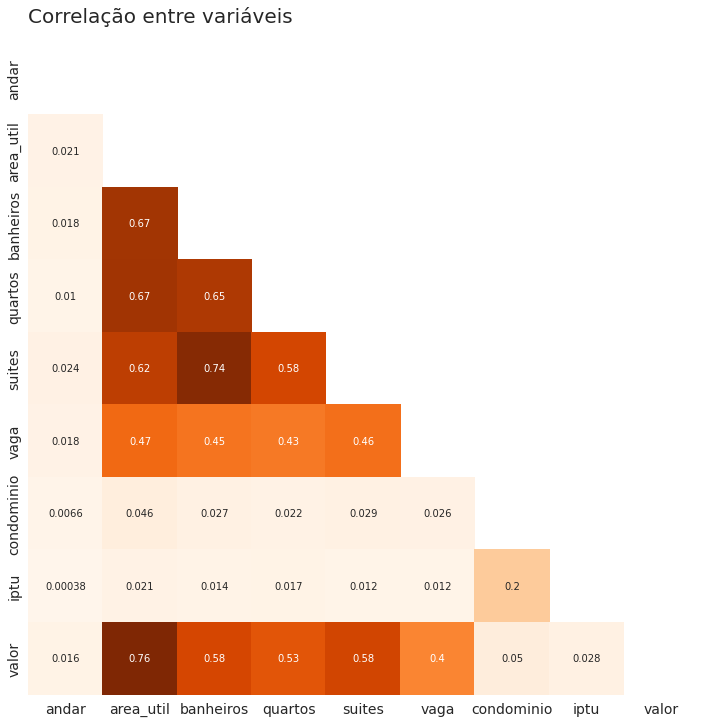

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.toPandas().set_index([input_col_corr])
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, fmt=".2",  annot=True, cbar=False, cmap='Oranges')
    ax.tick_params(labelsize=14)
    ax.set_title('Correlação entre variáveis', fontsize=20, loc='left', pad=20)

Podemos perceber, pelo gráfico acima, que a variável valor possui uma correlação mais alta com as variáveis area_util e banheiros, porém essa correlação não é tão alta. Dessa forma, não vamos descartar nenhuma dessas variáveis.

------------------

# Vetorizando os dados

Para utilizarmos nossa base de dados em modelos de machine learning do PySpark, vamos precisar utilizar uma técnica chamada de vetorização dos dados, para isso utilizaremos a classe VectorAssembler da biblioteca pyspark.ml.feature.

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
dados_5 = dados_5.withColumnRenamed('valor','label')

Vamos utilizar todas as colunas, exceto as colunas:

 - label - por ser nossa variável alvo;
 - id - por ser um identificador único;
 - bairro - por ser uma variável categórica que não foi transformada em dummy pois possui muitas categorias.

In [ ]:
input_col = [i for i in dados_5.columns if i not in ['label', 'id', 'bairro']]

In [ ]:
assembler = VectorAssembler(inputCols = input_col, outputCol = 'features')

In [ ]:
dados_5.show(5)

+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|                  id|andar|area_util|banheiros|quartos|suites|vaga|     bairro|condominio|  iptu|    label|Zona Central|Zona Norte|Zona Oeste|Zona Sul|Academia|Animais permitidos|Churrasqueira|Condomínio fechado|Elevador|Piscina|Playground|Portaria 24h|Portão eletrônico|Salão de festas|
+--------------------+-----+---------+---------+-------+------+----+-----------+----------+------+---------+------------+----------+----------+--------+--------+------------------+-------------+------------------+--------+-------+----------+------------+-----------------+---------------+
|02fba6ef-a691-442...|    3|     64.0|        1|      2|     2|   1|Jacarepaguá|     784.0|  80.0| 380000.0|           0|         0| 

In [ ]:
dados_5_prep = assembler.transform(dados_5).select('features', 'label')

In [ ]:
dados_5_prep.show(5, truncate = False)

+-----------------------------------------------------------------------------------------+---------+
|features                                                                                 |label    |
+-----------------------------------------------------------------------------------------+---------+
|(22,[1,2,3,4,5,6,7,11,16],[410.0,3.0,4.0,1.0,1.0,3300.0,5780.0,1.0,1.0])                 |4600000.0|
|(22,[0,1,2,3,5,6,7,9,13,16,20,21],[1.0,50.0,1.0,1.0,1.0,500.0,600.0,1.0,1.0,1.0,1.0,1.0])|360000.0 |
|(22,[1,2,3,4,5,10,14,16,17],[148.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0])                     |1200000.0|
|(22,[1,2,3,6,7,11,16],[104.0,1.0,2.0,1010.0,272.0,1.0,1.0])                              |750000.0 |
|(22,[1,2,3,5,6,7,11,16],[71.0,2.0,2.0,1.0,1312.0,360.0,1.0,1.0])                         |1025000.0|
+-----------------------------------------------------------------------------------------+---------+
only showing top 5 rows



# Construindo modelos de regressão

Com os nossos dados já vetorizados pelo VectorAssembler, vamos construir modelos de regressão para nos auxiliar na previsão dos valores de imóveis. Para isso, vamos utilizar a biblioteca pyspark.ml.regression do PySpark.

# Random Forest

Documentação da classe Random Forest Regressor
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.regression.RandomForestRegressor.html

Random Forest é um modelo de Machine Learning que utiliza a técnica de ensemble learning. Esse modelo é composto por uma coleção de árvores de decisão. Cada uma dessas árvores é treinada com uma amostra aleatória do conjunto de dados. Ao final, o modelo faz a média dos resultados de cada uma das árvores.

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

In [ ]:
treino, teste = dados_5_prep.randomSplit([0.7, 0.3], seed=101)

In [ ]:
rfr = RandomForestRegressor(seed=13, maxDepth=13, numTrees=13)

In [ ]:
modelo_rfr = rfr.fit(treino)

In [ ]:
previsoes_rfr_treino = modelo_rfr.transform(treino)

In [ ]:
previsoes_rfr_treino.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(22,[0,1,2,3,4,5,...| 445000.0|  415835.172778227|
|(22,[0,1,2,3,4,5,...| 539000.0| 451560.2728834482|
|(22,[0,1,2,3,4,5,...| 262000.0|501521.83331228397|
|(22,[0,1,2,3,4,5,...| 460000.0| 321846.5134059897|
|(22,[0,1,2,3,4,5,...| 540000.0| 587197.4810444112|
|(22,[0,1,2,3,4,5,...|1047795.0| 677568.1166344186|
|(22,[0,1,2,3,4,5,...| 750000.0| 641681.7497135588|
|(22,[0,1,2,3,4,5,...| 795000.0|  781051.640558442|
|(22,[0,1,2,3,4,5,...| 391000.0|338108.94432804355|
|(22,[0,1,2,3,4,5,...| 473400.0| 523395.6773296465|
|(22,[0,1,2,3,4,5,...| 659900.0|  552581.348329965|
|(22,[0,1,2,3,4,5,...| 797204.0| 630255.9862432061|
|(22,[0,1,2,3,4,5,...| 499000.0| 604594.9032376832|
|(22,[0,1,2,3,4,5,...| 550000.0| 618637.9682132212|
|(22,[0,1,2,3,4,5,...|1400000.0|1403356.5624312793|
|(22,[0,1,2,3,4,5,...|2450000.0| 2286687.554945055|
|(22,[0,1,2,

# Métricas

As métricas que vamos utilizar para fazer a avaliação de como nossos modelos estão se comportando são:

**RMSE** - Raiz do Erro Quadrático Médio. É a métrica que calcula a raiz quadrada do erro médio entre os valores reais e as predições da regressão. Quanto menor esse valor, melhor será o modelo, uma vez que estará cometendo menos erros. Matematicamente, pode ser definida como:

Fórmula: RMSE igual à raiz quadrada de 1 sobre n multiplicado pelo somatório de j indo de 1 a n do quadrado de y_j menos y_j chapéu

**R2** ou **coeficiente de determinação** - É uma medida estatística que representa a porcentagem de variação da variável resposta que é explicada pelo modelo de regressão. Por se tratar de uma porcentagem, seu valor varia de 0 a 1, onde:

0 indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média;
1 indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.
Portanto, quanto mais próximo de 1 for o valor de R2, melhor será o desempenho do modelo de regressão. Se estivermos trabalhando com apenas duas variáveis, o coeficiente R2 será o quadrado do coeficiente de correlação de Pearson entre as duas variáveis.

Para fazer a análise de como os modelos estão se comportando, vamos utilizar a classe RegressionEvaluator da biblioteca pyspark.ml.evaluation.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
evaluator = RegressionEvaluator()

In [ ]:
# Métricas do treino

print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print(evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))

0.9185122785765222
421124.5207677481


In [ ]:
previsoes_rfr_teste = modelo_rfr.transform(teste)
previsoes_rfr_teste.show()

+--------------------+---------+------------------+
|            features|    label|        prediction|
+--------------------+---------+------------------+
|(22,[0,1,2,3,4,5,...| 349000.0| 365287.9827562858|
|(22,[0,1,2,3,4,5,...| 400000.0|417602.46887839545|
|(22,[0,1,2,3,4,5,...| 318000.0| 499290.2801867109|
|(22,[0,1,2,3,4,5,...| 335000.0| 571997.7163192163|
|(22,[0,1,2,3,4,5,...| 950000.0| 1181778.364511306|
|(22,[0,1,2,3,4,5,...|1250000.0|1211884.9239160526|
|(22,[0,1,2,3,4,5,...| 355000.0|384207.83408775344|
|(22,[0,1,2,3,4,5,...| 300000.0|501852.43024278467|
|(22,[0,1,2,3,4,5,...|1540000.0|1220799.2352450895|
|(22,[0,1,2,3,4,5,...| 290000.0| 457282.2008590971|
|(22,[0,1,2,3,4,5,...| 750000.0| 663088.2884516991|
|(22,[0,1,2,3,4,5,...| 852288.0| 568112.7585863753|
|(22,[0,1,2,3,4,5,...| 940000.0| 753980.2156219502|
|(22,[0,1,2,3,4,5,...| 650000.0| 952100.4342018175|
|(22,[0,1,2,3,4,5,...| 750000.0| 420883.1981937607|
|(22,[0,1,2,3,4,5,...| 650000.0| 565136.3869482089|
|(22,[0,1,2,

In [ ]:
print('Random Forest Regression')
print("="*30)
print("Dados de Treino")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_treino, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Dados de Teste")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))

Random Forest Regression
Dados de Treino
R²: 0.918512
RMSE: 421124.520768

Dados de Teste
R²: 0.831875
RMSE: 600174.289064


# Extra: Otimização

Vamos tentar melhorar o desempenho do nosso modelo utilizando a técnica de otimização de hiperparâmetros, utilzando validação cruzada. Para isso, vamos utilizar a classe CrossValidator da biblioteca pyspark.ml.tuning e para definir o espaço de busca dos hiperparâmetros, vamos utilizar a classe ParamGridBuilder.

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
grid = ParamGridBuilder() \
    .addGrid(rfr.numTrees, [10, 20, 30]) \
    .addGrid(rfr.maxDepth, [5, 10]) \
    .addGrid(rfr.maxBins, [10, 32, 45]) \
    .build()

In [ ]:
evaluator = RegressionEvaluator()

In [ ]:
rfr_cv = CrossValidator(
    estimator=rfr,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3
)

In [ ]:
modelo_rfr_cv = rfr_cv.fit(treino)

In [ ]:
# Quais os melhores parâmetros para o modelo?

modelo_rfr_cv.bestModel

RandomForestRegressionModel: uid=RandomForestRegressor_71334b3ce57e, numTrees=30, numFeatures=22

In [ ]:
previsoes_rfr_cv_teste = modelo_rfr_cv.transform(teste)

In [ ]:
print('Random Forest')
print("="*30)
print("Sem Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_teste, {evaluator.metricName: "rmse"}))
print("")
print("="*30)
print("Com Cross Validation")
print("="*30)
print("R²: %f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "r2"}))
print("RMSE: %f" % evaluator.evaluate(previsoes_rfr_cv_teste, {evaluator.metricName: "rmse"}))

Random Forest
Sem Cross Validation
R²: 0.831875
RMSE: 600174.289064

Com Cross Validation
R²: 0.832326
RMSE: 599369.025139


# Extra: Implementando o Gradient-boosted tree regression

Implemente o algoritmo Gradiente Boosted e o avalie

In [ ]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor()

In [ ]:
modelo_gbt = gbt.fit(treino)

In [ ]:
previsoes_gbt_treino = modelo_gbt.transform(treino);

In [ ]:
previsoes_gbt_treino.select("prediction", "label", "features").show(5)

+-----------------+--------+--------------------+
|       prediction|   label|            features|
+-----------------+--------+--------------------+
|276847.2385024432|445000.0|(22,[0,1,2,3,4,5,...|
|276847.2385024432|539000.0|(22,[0,1,2,3,4,5,...|
|497457.3531804119|262000.0|(22,[0,1,2,3,4,5,...|
|303313.9400521877|460000.0|(22,[0,1,2,3,4,5,...|
|565320.0693515356|540000.0|(22,[0,1,2,3,4,5,...|
+-----------------+--------+--------------------+
only showing top 5 rows



In [ ]:
previsoes_gbt_teste = modelo_gbt.transform(teste);

In [ ]:
print("Root Mean Squared Error (RMSE) nos dados de teste: %g" % evaluator.evaluate(previsoes_gbt_teste, {evaluator.metricName: "rmse"}))

print("R2 nos dados de teste: %g" % evaluator.evaluate(previsoes_gbt_teste, {evaluator.metricName: "r2"}))

Root Mean Squared Error (RMSE) nos dados de teste: 655483
R2 nos dados de teste: 0.79946
